# Os Gigantes da Steam: An√°lise dos 1000 Jogos Mais Bem Avaliados

# Integrantes: 
Caio Vitor Melo de Santana

Rougger Xavier Guerra Neto

Gabriel Negreiros Saraiva

Rodolfo Fran√ßa Souza


## Perguntas da An√°lise ‚ùì
* Quais s√£o os g√™neros de jogos que tem as melhores classifica√ß√µes m√©dias? 
* Quais s√£o as plataformas com mais jogos entre os mil mais bem avaliados da Steam? 
* H√° alguma rela√ß√£o entre os jogos mais populares serem os mais bem avaliados? 


# Introdu√ß√£o - Analise de Dados Steam - v2.0 Reboot
Optamos por refazer nosso projeto do zero, pois j√° havia outro grupo trabalhando com o mesmo DataFrame, e tamb√©m porque o grupo, coletivamente, n√£o gostou muito das possibilidades de an√°lise oferecidas pelo CSV que ir√≠amos utilizar. Nesse sentido, buscamos dados que consideramos mais interessantes para realizar an√°lises, ainda sobre o mesmo tema ‚Äì jogos da Steam. A escolha do tema foi devido ao interesse comum dos integrantes do grupo por videogames, dessarte pareceu natural a escolha. Mas muito pode ser falado sobre videogames ent√£o teve que ser decidido um recorte, para isso procuramos, inv√©s de vendas, usar como recorte os mil jogos mais bem avaliados da Steam. Esses dados foram relativamente f√°ceis de encontrar, j√° que a Steam os divulga publicamente, ao contr√°rio dos dados de venda, que s√£o mantidos em segredo pelas empresas que produzem os jogos. J√° dados de avalia√ß√£o s√£o disponibilizados ao p√∫blico pela Steam, e existem organiza√ß√µes como a SteamDB que compila esses dados atrav√©s da API oficial da Steam. 

# Sum√°rio:
- Pr√©-An√°lise
    - 0.1 Recolhendo dados: Da raspagem √† limpeza.
        - 0.1.1 Webscraping do SteamDB 
        - 0.1.2 Requisitando a API do Internet Game Database 
        - 0.1.3 Limpeza do Dataset 
- Perguntas
- An√°lises
    - Parte 1
        - 1.1 M√©dias
            - 1.1.1 M√©dias do SteamDB
            - 1.1.2 M√©dias do Internet Game Database
        - 1.2 Medianas
            - 1.2.1 Mediana das informa√ß√µes do SteamDB
            - 1.2.2 Mediana das informa√ß√µes do Internet Game Database
        - 1.3 Modas/Agrupamentos
            - 1.3.1 Modo de jogo com mais avalia√ß√µes positivas e negativas
            - 1.3.2 Plataforma com mais avalia√ß√µes positivas e negativas
            - 1.3.3 Game engine com mais avalia√ß√µes positivas e negativas 
            - 1.3.4 Perspectiva do jogador com mais avalia√ß√µes positivas e negativas 
            - 1.3.5 Top 10 G√™neros de jogos com mais avalia√ß√µes positivas e negativas
                - 1.3.5.a Listagem de g√™neros dos jogos
                - 1.3.5.b Generos que apresentam o maior numero de reviews positivas e negativas na Steam 
    - Parte 2: Medidas de Dispers√£o
        - 2.1 Boxplot
            - 2.1.1 Boxplot das reviews negativas
            - 2.1.2 Boxplot das reviews positivas
        - 2.2 Desvio Padr√£o
            - 2.2.1 Desvio padr√£o de reviews (Positivas/Negativas)
                - 2.2.1.a Sobre as avalia√ß√µes positivas
                - 2.2.1.b Sobre as avalia√ß√µes negativas
            - 2.2.2 Desvio padr√£o do total de avalia√ß√µes
                - 2.2.2.a Encontrando os outliers atrav√©s do z-score do desvio padr√£o.
    - Parte 3: Gr√°ficos
        - 3.1 Plataformas
            - 3.1.1 As dez plataformas que mais lan√ßaram jogos entre 1992 e 2004. (Histograma Vertical)
            - 3.1.2 As dez plataformas que mais lan√ßaram jogos por ano (Grafico de Linhas) 
        - 3.2 Correla√ß√£o Avaliativa
            - 3.2.1 Uma boa avalia√ß√£o do jogo na Steam se relaciona com o total de reviews?
            - 3.2.2 Representa√ß√£o grafica da correla√ß√£o entre raz√£o positiva de reviews e o total (Matriz de Correla√ß√£o)
                - 3.2.2.a Adere√ßando dados outliers para melhorar visualiza√ß√£o do gr√°fico 
        - 3.3 G√™neros
            - 3.3.1 G√™neros de jogos com maior sucesso entre o p√∫blico (Histograma Horizontal)
            - 3.3.2 G√™nero de Jogos com Maior Sucesso entre a Cr√≠tica 
            - 3.3.3 G√™neros de Jogos: Cr√≠tica vs. P√∫blico (Tabela Comparativa)
                - 3.3.3.a Tabela da varia√ß√£o de posi√ß√µes dos g√™neros de jogos entre p√∫blico e cr√≠tica 
        - 3.4 Score
    - Parte 4: K-Means
    - Parte 5: Conclus√£o

---


## Parte 0: Pr√©-An√°lise
- 0.1 Recolhendo dados: Da raspagem √† limpeza.
    - 0.1.1 Webscraping do SteamDB 
    - 0.1.2 Requisitando a API do Internet Game Database 
    - 0.1.3 Limpeza do Dataset 

# Recolhendo Dados: Da raspagem √† limpeza de Dataset (0.1)

## Fonte de Dados: SteamDB (0.1.1)
Pudemos observar atrav√©s do SteamDB esses mil jogos mais bem avaliados em rela√ß√£o √† propor√ß√£o de avalia√ß√µes positivas e negativas deixadas pela comunidade da Steam. No entanto, n√£o havia no Kaggle ou em sites similares um CSV com essas informa√ß√µes. Pesquisando um pouco, e com os ensinamentos da aula de Introdu√ß√£o a Computa√ß√£o, observamos que era possivel obter esses dados atrav√©s de Webscraping, e assim o fizemos: utilizando a biblioteca BeautifulSoup4 foi poss√≠vel extrair os dados facilmente do site (c√≥digo dispon√≠vel em ./Extras/webscraping/raspagem_steamdb_bs4) o site requeria login para acessar a visualiza√ß√£o sem restri√ß√£o dos mil jogos. Com uma r√°pida sacada foi f√°cil burlar esse requerimento, a solu√ß√£o era simples: baixar a a p√°gina da Web enquanto logado atrav√©s do usu√°rio da Steam no SteamDB... e funcionou! Como as informa√ß√µes estavam diretamente escritas no c√≥digo fonte da p√°gina, n√£o apresentou nenhum problema maior. Foi apenas criar um la√ßo e indicar as tags seletoras do CSS respons√°veis por cada dado espec√≠fico, enquanto escrevia num arquivo json o rank, nome do jogo, avalia√ß√µes positivas/negativas, total de reviews e a porcentagem da avalia√ß√£o.

###### Raspagem do Steamdb realizada dia 08 de outubro de 2024.

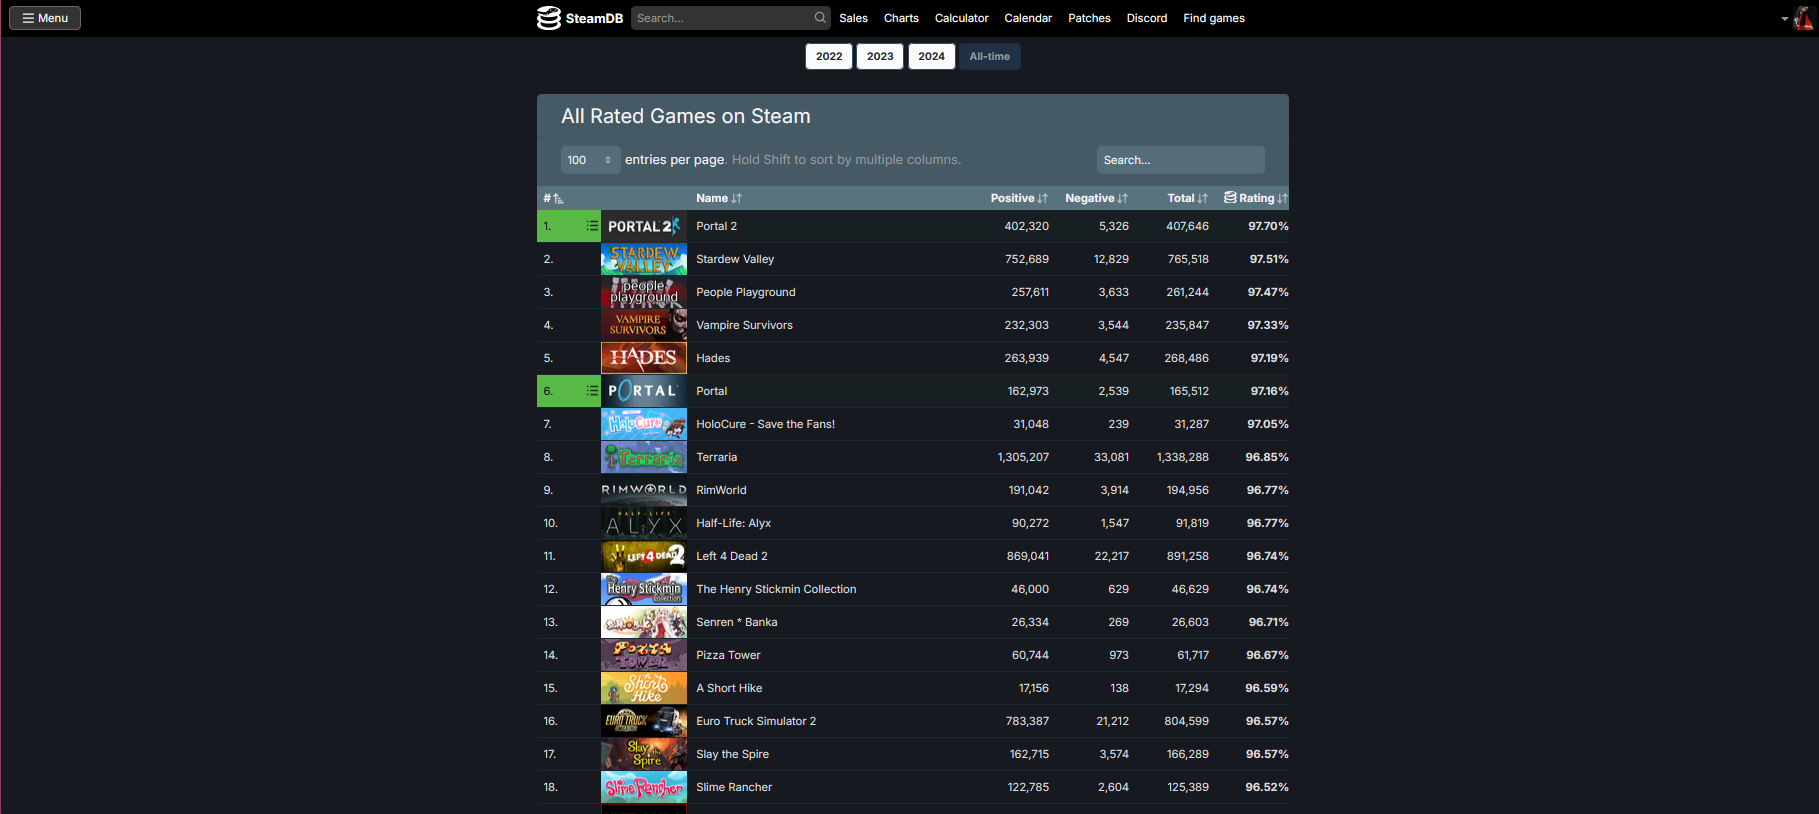

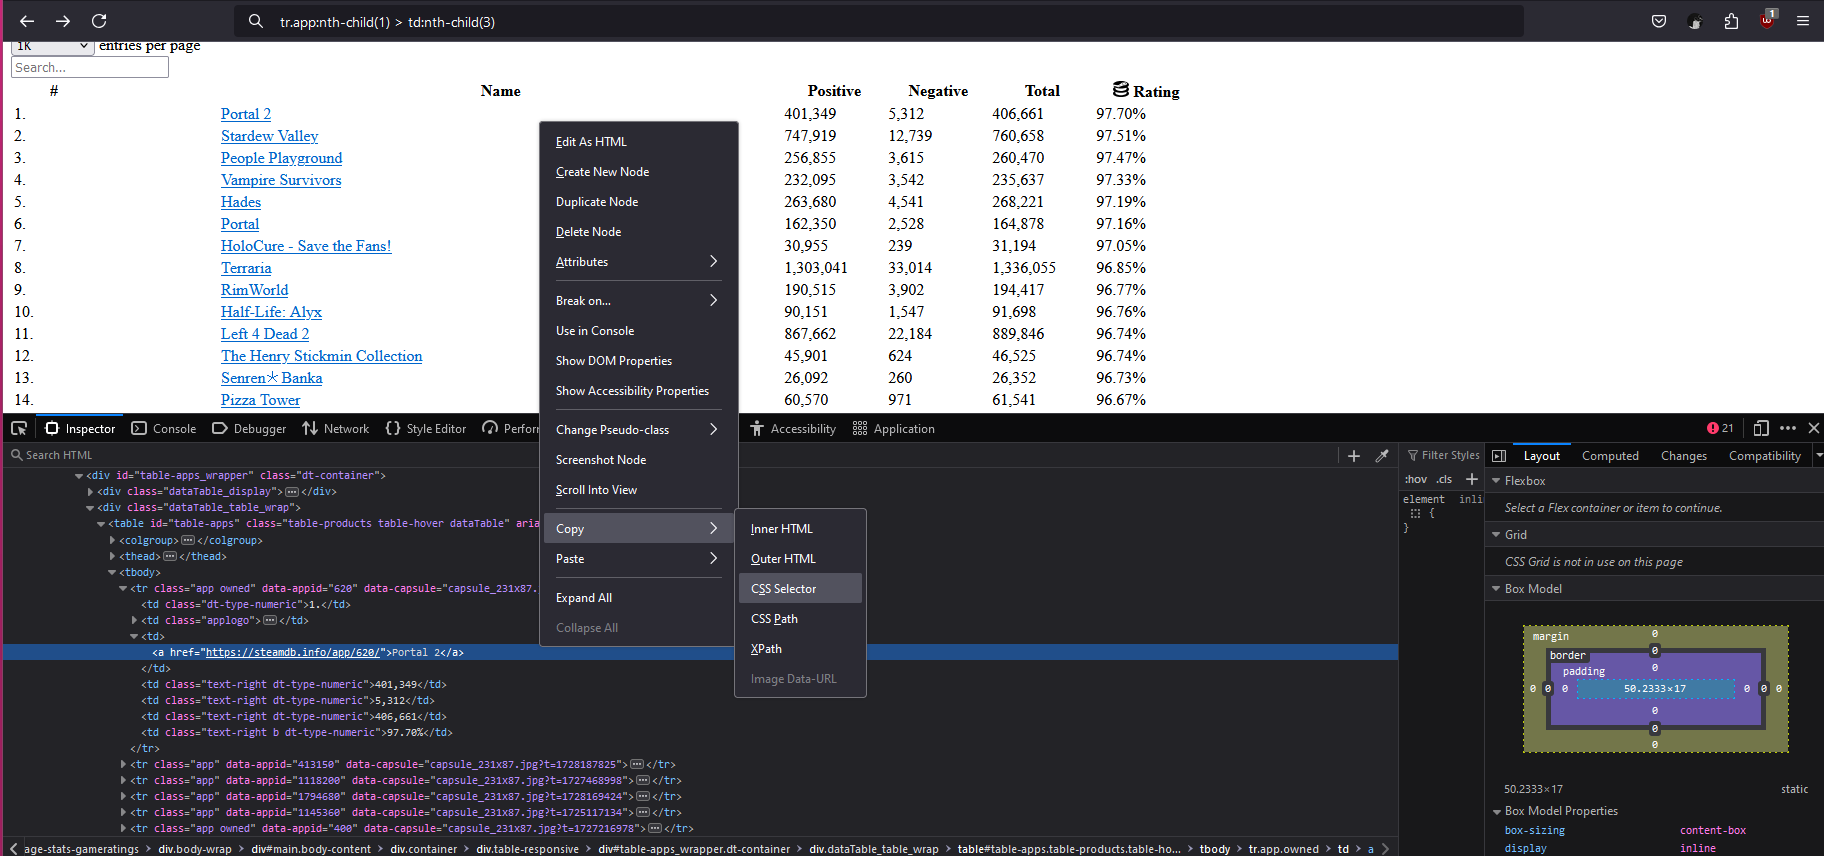

In [11]:
import IPython
from IPython.display import Image, display
display(Image(filename='steamdb2.png'))
display(Image(filename='steamdb.png'))

In [ ]:
from bs4 import BeautifulSoup  
import json

html_file_path = 'steamdb.htm'

with open(html_file_path, 'r', encoding='utf-8') as file:
    soup = BeautifulSoup(file, 'html.parser')  
all_games_data = []

rows = soup.select('tr.app')  

# iterar para pegar todas as informa√ß√µes
for i in range(1000):
    if i < len(rows):
        row = rows[i]  

        rank_number = row.select_one('td.dt-type-numeric').text
        game_name = row.select_one('td:nth-child(3) > a:nth-child(1)').text
        positive_ratings = row.select_one('td:nth-child(4)').text
        negative_ratings = row.select_one('td:nth-child(5)').text
        total_reviews = row.select_one('td:nth-child(6)').text
        rating_percentage = row.select_one('td:nth-child(7)').text

        # Entrada de dicionario para escrever no json
        new_entry = {
            'rank': rank_number,
            'name': game_name,
            'positive ratings': positive_ratings,
            'negative ratings': negative_ratings,
            'total reviews': total_reviews,
            'rating percentage': rating_percentage
        }

        all_games_data.append(new_entry)

json_file_path = '../3_game_ratings.json'

# importante usar encoding utf-8 e ensure_ascii para n√£o quebrar com os jogos em japon√™s/chin√™s escritos com kanji
with open(json_file_path, 'w', encoding='utf-8') as json_file:
    json.dump(all_games_data, json_file, ensure_ascii=False, indent=4)  

print(f"Data written to {json_file_path}: {all_games_data}")


## Fonte de dados 2: Internet Game Database (IGDB) (0.1.2)
Apesar das informa√ß√µes coletadas serem incentivantes, a partir de uma reflex√£o do grupo percebemos que esses dados n√£o seriam suficientes para an√°lises mais interessantes. Haja visto que o SteamDB oferece apenas tr√™s vari√°veis: avalia√ß√µes positivas, negativas e o total. O rating √© derivado do quociente entre as avalia√ß√µes positivas e negativas e o ranking dos ratings mais altos. Nesse sentido, procuramos formas de reunir outras informa√ß√µes sobre esses jogos. A mais simples e copiosamente trabalhosa seria de preencher manualmente informa√ß√µes das mil entradas. Informa√ß√µes que desejavamos eram dados como data de lan√ßamento, em que plataforma foi publicado o jogo, g√™nero do jogo, se √© individual ou multijogador, uma nota mais geral dos cr√≠ticos para comparar com as reviews da Steam. A segunda op√ß√£o seria utilizar alguma API para fornecer os dados dos mil jogos em sequ√™ncia e retornar as informa√ß√µes sobre eles. A segunda op√ß√£o parecia mais s√£ e vi√°vel, s√≥ que dado a inexperi√™ncia dos participantes em rela√ß√£o as quest√µes das especificidades das requisi√ß√µes de API, acabou demorando tanto quanto a frugal atividade copiosa de preencher as mil entradas tal qual um monge em um scriptorium medieval. Encontramos algumas op√ß√µes, entre elas um site chamado [RAWG](https://rawg.io/apidocs) e outro [IGDB](https://api-docs.igdb.com/#getting-started), apesar de ambos terem uma op√ß√£o gratuita, o IGDB era inteiramente gratuito e olhando sua documenta√ß√£o parecia ser um pouco mais simples e tinha um wrapper escrito em python (o que animou a primeira vista). Acabou que o empacotador era muito rudimentar/n√£o soubemos como utilizar e acabamos por utilizar os requests normalmente atrav√©s das endpoints. O empacotador mais desenvivolvido pela equipe do IGDB era em javascript, mas ningu√©m da equipe sabendo bolhufas da lingua decidimos bater a cabe√ßa com python mesmo.

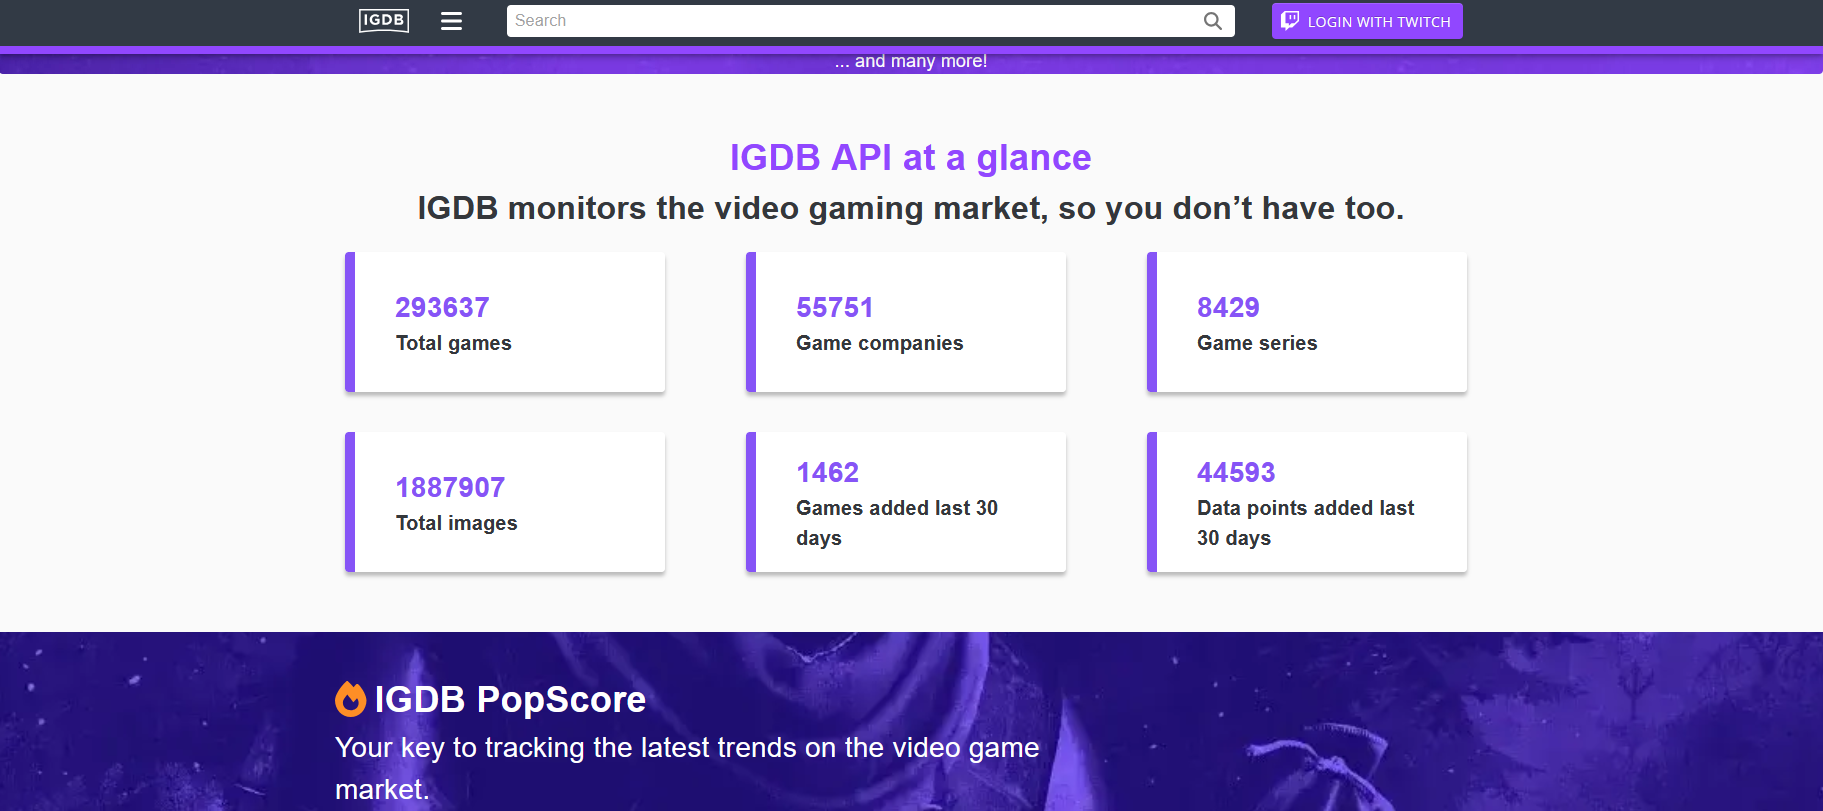

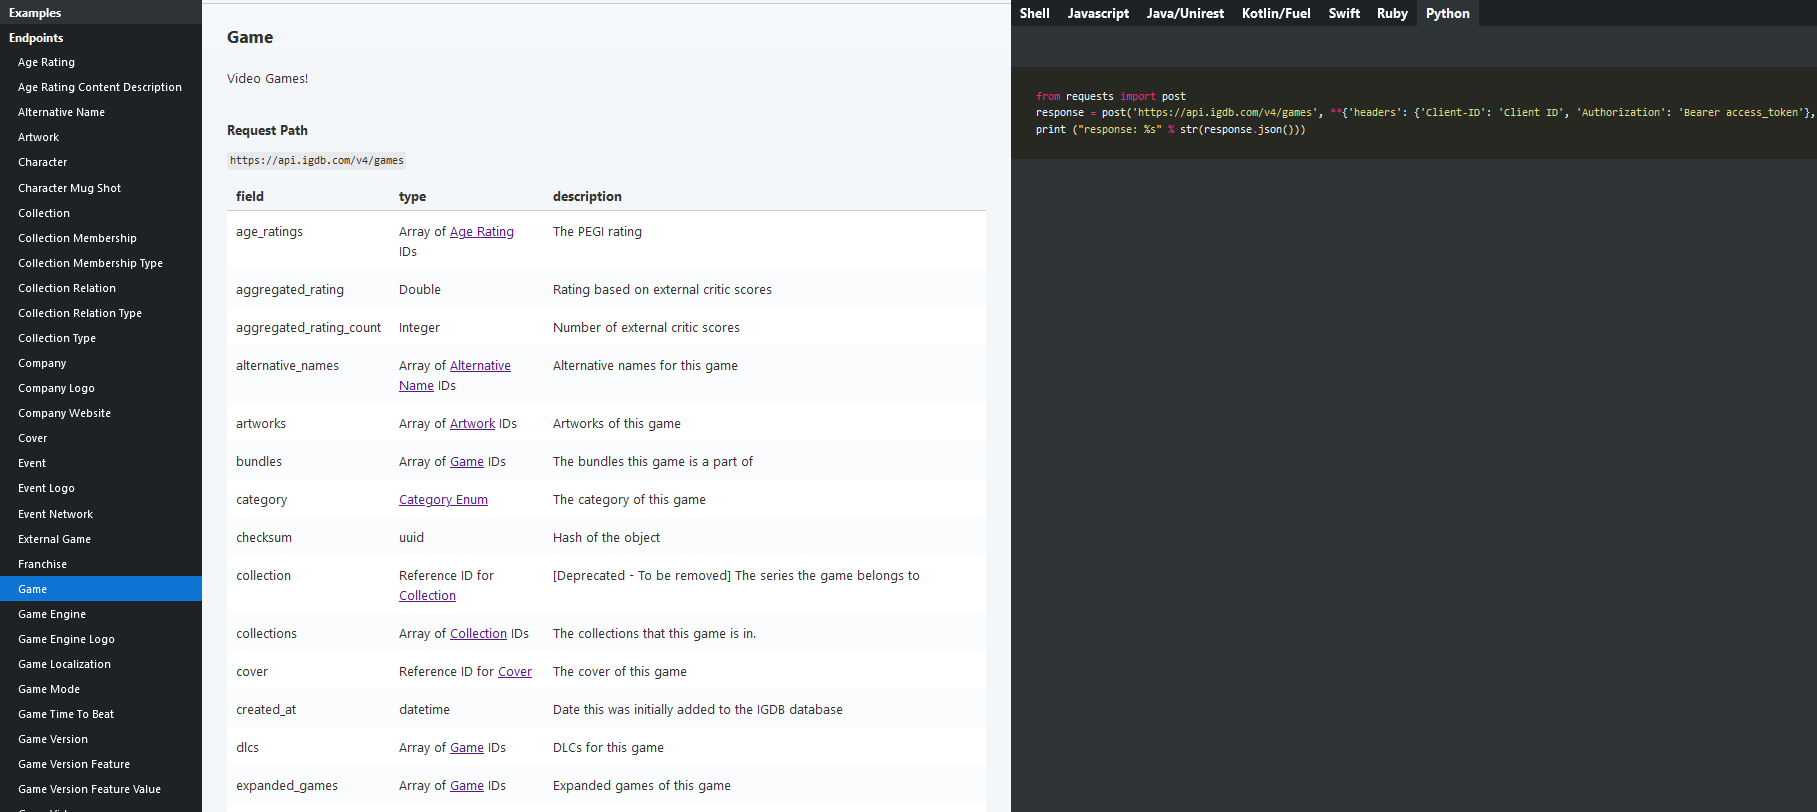

In [13]:
display(Image(filename='igdb.png'))
display(Image(filename='igdb2.png'))

Uma forma mais simples de fazer uma requisi√ß√£o para o IGDB: 

In [ ]:
import requests
import json
import os
from dotenv import load_dotenv

load_dotenv()

# Credenciais
client_id = os.getenv('CLIENT_ID')
acess_token = os.getenv('CLIENT_SECRET')
api_url = 'https://api.igdb.com/v4/'

HEADERS = {
    'Client-ID': client_id,
    'Authorization': f'Bearer {acess_token}'
}

game_name = "Red Dead Redemption"

url_endpoint = 'games'
current_request_url = api_url + url_endpoint
# examples:
#   data = 'fields name,category,platforms; limit 20;'
#   data = 'fields name,rating; sort rating desc; limit 20;'
data = f'search "{game_name}"; fields name;'

# Requisi√ß√£o
response = requests.post(current_request_url, headers=HEADERS, data=data)

if response.status_code == 200:
    print("Request Sucess")
    print(response.text)
    with open('data.json', 'w') as json_file:
        json.dump(response.json(), json_file, indent=4)
else:
    print(f"Request Error: {response.status_code}")
    print(response.text)

Isso pressup√µe j√° ter um token de autoriza√ß√£o que envolve ter uma conta da Twitch e cadastrar uma credencial na pr√≥pria Twitch e depois fazer uma requisi√ß√£o post utilizando as credenciais de usu√°rio adquiridas na aplica√ß√£o da Twitch (client id e client secret) fazemos a requisi√ß√£o POST nesse formato 

``` bash
POST: https://id.twitch.tv/oauth2/token?client_id=abcdefg12345&client_secret=hijklmn67890&grant_type=client_credentials
```
para que o servidor do IGDB retorne um json com o Token de Acesso para a API:

```json
{
  "access_token": "access12345token",
  "expires_in": 5587808,
  "token_type": "bearer"
}
```

Com o Client ID e Acess Token √© poss√≠vel realizar a requisi√ß√£o enquanto a API do IGDB como demonstrado no exemplo do c√≥digo em Python acima. As limita√ß√µes da API s√£o de 4 requisi√ß√µes por segundo, o que √© muito bom, significa que cada vez que rodava as requisi√ß√µes para os mil jogos seria 4 minutos e 10 segundos. 

$$
\frac{1000 \text{ (jogos)}}{4 \text{ (requisi√ß√µes)}} = \frac{250 \text{ segundos}}{60 \text{ segundos}} = 4 \text{ minutos e } 10 \text{ segundos.}
$$


E isso foi importante porque rodamos incont√°veis vezes esse c√≥digo at√© sair algo satisfat√≥rio. 

### Como fazemos as requisi√ß√µes para a API?
```python
class IGDBApiWrapper:

    all_games_tmp_file = 'fetch_details_for_all_games.json'

    # autoriza√ß√£o
    def __init__(self):
        load_dotenv()
        self.client_id = os.getenv('CLIENT_ID')
        self.access_token = os.getenv('CLIENT_SECRET')
        self.api_url = 'https://api.igdb.com/v4/'
        self.headers = {
            'Client-ID': self.client_id,
            'Authorization': f'Bearer {self.access_token}'
        }

    # requisi√ß√£o geral
    def _make_request(self, endpoint, data):
        url = f"{self.api_url}{endpoint}"
        response = requests.post(url, headers=self.headers, data=data)
            
        return response.json()
        
    # pesquisar um jogo
    def search_game_details(self, game_name, search_query=0):
        req_ask = f'search "{game_name}"; fields *;'
        game_data = self._make_request('games', data=req_ask)
        
        return game_data[search_query]

    # funcao para escrever info no json
    def load_games_data(self, file_path):
        with open(file_path, 'r', encoding='utf-8') as json_file:
            return json.load(json_file)


    # funcao principal para pegar o id das informacoes sobre todos os jogos
    def fetch_details_for_all_games(self, read_file_path, initial_limit=0, end_limit=0):
        games_data = self.load_games_data(read_file_path)

        results = {}
        # segundo a database o limite √© de 4 requisi√ß√µes por segundo
        request_limit_per_second = 4  
        delay_between_requests = 1 / request_limit_per_second  

        if initial_limit != 0 or end_limit != 0:  
            games_data = dict(list(games_data.items())[initial_limit:end_limit])
            
        for game_name, details in games_data.items():
            print(f"Fetching details for: {game_name}")
            try:
                game_details = self.search_game_details(game_name)
                results[game_name] = game_details
            except requests.HTTPError as e:
                print(f"Error fetching details for {game_name}: {e}")
            time.sleep(delay_between_requests)

            
        self.write_data_to_file(results, output='fetch_details_for_all_games.json')

        return results

        # funcao exemplo de retornar as informa√ß√µes com os ids supridos pelo arquivo json que gerado pela fun√ß√£o fetch_details_for_all_games()
        def fetch_genre_for_all_games(self, file_path, initial_limit=0, end_limit=0):
            games_data = 'fetch_details_for_all_games.json'
            tmp_file_exists = self.check_baseline_info()

            # checar se o arquivo com os ids das categorias dos endpoints esta disponivel
            if tmp_file_exists:
                games_data = tmp_file_exists 
            else:
                print("Baseline info not present. Getting from API...")
                games_data = self.fetch_details_for_all_games(file_path, initial_limit, end_limit)

            all_games_data = self.load_games_data(games_data)

            genres_names = {}
            genres = {}
            for game_name in games_data.keys():
                print(game_name)
                game_data = games_data[game_name]

                # Verificar se a chave 'genres' existe antes de acessar
                if 'genres' in game_data:
                    id_genres = game_data['genres']
                    id_genres_str = ', '.join(map(str, id_genres))

                    # Solicitar nomes dos g√™neros
                    req_ask = f'fields id, name; where id = ({id_genres_str});'
                    genres_data = self._make_request(endpoint='genres', data=req_ask)

                    # Obter apenas os nomes dos g√™neros retornados
                    genre_names = [genre['name'] for genre in genres_data]
                else:
                    genre_names = []  # Definir lista vazia se a chave 'genres' n√£o estiver presente

                genres[game_name] = genres_data if 'genres' in game_data else []
                genres_names[game_name] = genre_names

            # Substituir os ids antigos dos g√™neros pelos nomes dos g√™neros
            for game_name in all_games_data:
                all_games_data[game_name]['genres'] = genres_names.get(game_name, [])

            self.write_data_to_file(data=all_games_data, output='fetch_genre_for_all_games.json')

            return genres_names
```

Esse √© um exemplo real de como pediamos para a API as informa√ß√µes espec√≠ficas. Quando se pergunta por um jogo para a API no endpoint /game ela retorna apenas os ids das informa√ß√µes que precisa ser processada por cada enpoint espec√≠fico daquela informa√ß√£o. Por exemplo, perguntar o genero de um jogo retorna o ID desse g√™nero que precisa ser processado na endpoint /genres. Por isso, decidimos por s√≥ pegar todos os ids e sobrescrever em um arquivo json. A string que a API retornava fica no lugar do ID que servia para fazer a requisi√ß√£o. Levou muito tempo para chegar nessa solu√ß√£o e ela n√£o funciona 100% para todos os endpoints, haja vista que alguns n√£o retornam strings como requisitado pelo 'name', por vezes retornam valores, listas, int. Assim como a forma de pedir por essa informa√ß√£o tamb√©m varia de acordo com a documenta√ß√£o da endpoint. Para isso, separamos essas fun√ß√µes espec√≠ficas em fun√ß√µes e colocamos em uma classe. Depois de muito bater a cabe√ßa e rodar c√≥digos quebrados conseguimos juntar o Dataset que era o principal objetivo.


Ap√≥s diversas tentativas conseguimos criar um arquivo que saiu algo minimamente aceit√°vel, ainda que n√£o tenhamos conseguido 100% de todas as informa√ß√µes que desej√°vamos. Ainda ficaram algumas informa√ß√µes de fora como o tempo para zerar o jogo ou a empresa que produziu o jogo. Mas haja vista que toda essa interp√©rie fez o grupo atrasar o prazo da avalia√ß√£o decidimos por fechar os trabalhos em rela√ß√£o a API e eliminar esses alguns dados que n√£o conseguimos. Os dados do SteamDB est√£o em perfeito estado - n√£o h√° nenhuma inconst√¢ncia - j√° do lado do IGDB n√£o s√£o 100% constantes com o retorno da API. Algumas algumas entradas n√£o est√£o presentes por diversos fatores. Isso constituindo uma caracter√≠stica compreend√≠vel, haja vista que seu banco de dados √© alimentado tamb√©m pela comunidade e n√£o h√° dados de todos os jogos poss√≠veis. Mas observando por um lado positivo, dos 1000 jogos do ranking da Steamdb apenas 76 jogos n√£o estavam dispon√≠veis como entrada no IGDB API. 

$$
\left( \frac{76}{1000} \right) \times 100 = 7.6\%
$$

Inversamente detemos informa√ß√£o de 92% dos dados.

$$
100\% - 7.6\% = 92.4\%
$$

Entre esses 76 jogos, reunimos as informa√ß√µes sobre cada um deles e sua posi√ß√£o no ranking (Dispon√≠vel na pasta Extras/nomes_dos_jogos/missing.txt). 
```yml
106: Sabbat of the Witch                       112: Dishonored RHCP                     145: Steins Gate                          156: The Textorcist - The Story of Ray Bibbia
170: Sally Face                                195: Batman - Arkham Asylum              205: SuchArt - Genius Artist Simulator    214: Until Then
217: Maitetsu: Last Run!!                      221: Arrow a Row                         228: ‰π∞‰∏™ÂèØ‰πêÈ•ºÂêßÔºÅ - Buy a Croquette!     229: LEGO Star Wars - The Complete Saga
232: Batman - Arkham City                      246: Kannagi Usagi                       274: Titanfall 2                          306: Abnormal Treatment
307: Doronko Wanko                             362: The Planet Crafter Prologue         364: Tales of the Neon Sea                368: The Elder Scrolls IV - Oblivion - Game of the Year Edition Deluxe
372: Medieval II - Total War                   383: Migrant Bird                        386: Spiritfarer - Farewell Edition       399: Black Box Lss - The Shining Immortal
404: Homicipher - Prologue                     408: Dusk of the Gods                    431: Tukoni Prologue                      432: South Scrimshaw
439: ÂΩºÊñπÁöÑÂ•π - Aliya                           442: Lay a Beauty to Rest                445: Tsukikage no Simulacre               452: Deathly Stillness
463: Flowers - Le volume sur ete               464: Touhou Hero of Ice Fairy            466: Valiant Hearts - The Great War       471: Rusted Warfare
502: Kaiju Princess                            508: ÊûùÊ±üÁïî‰πãÊ¢¶                           513: Needy Streamer Overload              537: Tails Noir Prologue
549: Mafia II                                  559: ÂÉèÁ¥†Â•≥Âèã                             560: LEGO Marvel Super Heroes             571: ÊàëÁöÑÂ∞èÈ≤®È±º
577: Steins;Gate 0                             586: 9-nine Episode 2                    594: Star Wars Battlefront                603: I Made a Game with Zombies in It!
625: Wataju - My Super Fulfilling Real Life    628: Êó∂Èó¥ÂàáÁâáÔºöÂ∫èÁ´†                       642: A Space For The Unbound              663: Maitetsu - Pure Station
674: Feeding Frenzy 2 - Shipwreck Showdown     706: Skyrim Script Extender              714: Save Room - Organization Game        721: Crime Scene Cleaner - Prologue
744: NOeSIS02 - ÁæΩÂåñ                            753: Exception                           763: Warhammer 40000 - Dawn of War       779: NOeSIS01 - ËØâËØ¥Ë∞éË®ÄÁöÑËÆ∞ÂøÜ‰πãÁâ©ËØ≠
812: ÊÅãÁà±ÁªÆË∞≠ - ‰∏çÂ≠òÂú®ÁöÑÁúüÁõ∏                     815: 9-nine Episode 4                    837: NIGHT-RUNNERS PROLOGUE               848: Soulstone Survivors - Prologue
861: Tetris Effect - Connected                 872: Irm√£o Grande & Brasileiro 2         883: ÊâÄÂêë‰πãÊú™Êù•                            896: The Riftbreaker - Prologue
918: Bishoujo Mangekyou                        936: Hyperdimension Neptunia Re Birth    941: Bunny E-shop                         958: Mass Effect 2
959: LEGO Star Wars III - The Clone Wars       960: DFHack Modding Engine               982: TCG Card Shop Simulator              996: Â≠¶ÁîüÊó∂‰ª£ÔºöÂ∫èÁ´†

```

Alguns dos jogos n√£o estavam dispon√≠veis no IGDB, outros estavam dando erro mesmo da API, alguns eram trial ou mods que n√£o estavam dispon√≠veis na biblioteca, esse problema foi presente principalmente nos t√≠tulos japoneses. 

N√£o querendo aceitar a derrota, recorreremos a preencher todos esses dados que estavam faltando de **forma manual**. Depois de uma longa e interminavel noite preenchemos todas as entradas com as informa√ß√µes que faltavam e poderiamos seguir ent√£o para a pr√≥xima etapa.



## Limpeza do Dataset (0.1.3)

Bom, tinhamos que fazer uma limpeza em algumas vari√°veis que viriam a dar erro nos c√≥digos das an√°lises: valores como strings, valores com v√≠rgulas, problemas de blackslash nas strings das plataformas e dos g√™neros. Uma pletora de elementos para o caos no c√≥digo da an√°lise. Na pasta ./Extras/Data_Cleasing h√° alguns dos m√©todos utilizados para limpar os dados. 
Os campos no dataset finais foram:
```
name, positive ratings, negative ratings, total reviews, rating percentage, category, first_release_date, platforms, genres, aggregated_rating, aggregated_rating_count, public_rating_igdb, public_rating_count, game_engines, game_modes, player_perspectives*
```
```json
    {
        "name": "Black Myth: Wukong",
        "positive ratings": 888106,
        "negative ratings": 34930,
        "total reviews": 923036,
        "rating percentage": "95.48%",
        "category": "main_game",
        "first_release_date": 1724112000,
        "platforms": [
            "PC (Microsoft Windows)",
            "PlayStation 5",
            "Xbox Series X|S"
        ],
        "genres": [
            "Role-playing (RPG)",
            "Adventure"
        ],
        "aggregated_rating": 8.8,
        "aggregated_rating_count": 5.0,
        "public_rating_igdb": 8.8,
        "public_rating_count": 95,
        "game_engines": [
            "Unreal Engine 5"
        ],
        "game_modes": [
            "Single player"
        ],
        "player_perspectives": [
            "Third person"
        ]
    },
```
#### Explicando cada um:
- ***name*** = nome do jogo (SteamDB)
- ***positive ratings*** = diz respeito as avalia√ß√µes positivas do jogo na steam. (SteamDB)
- ***negative ratings*** = diz respeito as avalia√ß√µes negativas do jogo na steam. (SteamDB)
- ***total reviews*** = total das reviews do jogo na steam tanto positiva quanto negativas. (SteamDB)
- ***ratine percentage*** = quociente entre reviews positivas e negativas, esse √© o dado utilizado para rankear os jogos. (SteamDB)
- ***category*** = se o jogo √© um jogo principal, dlc, mod, remake etc. (IGDB)
- ***first_release_date*** = primeira data de lan√ßamento do jogo em unix timestamp. (IGDB)
- ***platforms*** = plataformas em que o jogo foi lan√ßado. (IGDB)
- ***g√™neros*** = g√™nero do jogo. (IGDB)
- ***aggregated_rating*** = m√©dia da nota dos cr√≠ticos dos ve√≠culos de imprensa. (IGDB)
- ***aggregated_rating_count*** = quantidade de cr√≠ticos que constru√≠ram essa m√©dia. (IGDB)
- ***public_rating_count*** = nota p√∫blica das pessoas dada no site do IGDB. (IGDB)
- ***public_rating_count*** = quantidade de pessoas que deram nota no site. (IGDB)
- ***game_engine*** = engine de programa√ß√£o utilizada pelos desenvolvedores do jogo. (IGDB)
- ***game_mode*** = Jogador individual, multijogador etc. (IGDB)
- ***player_perspectives*** = perspectiva do jogador, sendo primeira pessoa, terceira pessoa etc. (IGDB)

In [109]:
import pandas as pd
df = pd.read_csv('games_data.csv')

# Exibir as colunas do DataFrame
print("Colunas dispon√≠veis no DataFrame:")
print(df.columns)


Colunas dispon√≠veis no DataFrame:
Index(['name', 'positive ratings', 'negative ratings', 'total reviews',
       'rating percentage', 'category', 'first_release_date', 'platforms',
       'genres', 'aggregated_rating', 'aggregated_rating_count',
       'public_rating_igdb', 'public_rating_count', 'game_engines',
       'game_modes', 'player_perspectives'],
      dtype='object')


In [113]:
import pandas as pd
df = pd.read_csv('games_data.csv')
print(df.dtypes)

name                        object
positive ratings             int64
negative ratings             int64
total reviews                int64
rating percentage           object
category                    object
first_release_date           int64
platforms                   object
genres                      object
aggregated_rating          float64
aggregated_rating_count    float64
public_rating_igdb          object
public_rating_count        float64
game_engines                object
game_modes                  object
player_perspectives         object
dtype: object


## Detalhando as perguntas de an√°lise

Separamos cada pergunta em outras menores para responder com um melhor grau de acuidade

### 1) Quais s√£o os g√™neros de jogos que tem as melhores classifica√ß√µes m√©dias? ü§î
**Quais g√™neros de jogos t√™m as melhores avalia√ß√µes m√©dias?**
- üìù **Justificativa:** A ideia aqui √© descobrir quais tipos de jogos s√£o mais bem avaliados pelo p√∫blico e pela cr√≠tica, ajudando a entender as prefer√™ncias de cada grupo.
- üìà **An√°lise:** 1.3.5 G√™nero de jogos com mais avalia√ß√µes positivas e negativas
- ‚úÖ **Resposta:** Em ambos os casos os G√™neros de aventura despontam como os g√™neros com mais avalia√ß√µes tantos positivas quanto negativas 

**Quais s√£o os g√™neros mais populares entre o p√∫blico e a cr√≠tica?**
- üìù **Justificativa:** Gr√°ficos foram criados para mostrar quais g√™neros s√£o mais bem recebidos pelos jogadores e pela cr√≠tica, ajudando a visualizar a diferen√ßa de percep√ß√£o entre os dois.
- üìà **An√°lise:** 3.3 Gr√°ficos sobre g√™neros de jogos
- ‚úÖ **Resposta:** 

#### Sum√°rio das an√°lises supracitadas:
- 1.3.5 G√™nero de jogos com mais avalia√ß√µes positivas e negativas
    - 1.3.5.a Listagem de g√™neros dos jogos
    - 1.3.5.b Generos que apresentam o maior numero de reviews positivas e negativas na Steam 
- 3.3 Gr√°ficos sobre g√™neros de jogos
    - 3.3.1 G√™neros de jogos de maior sucesso entre o p√∫blico
    - 3.3.2 G√™neros de jogos de maior sucesso entre os ve√≠culos de cr√≠tica
    - 3.3.3 Comparativo entre cr√≠tica vs. p√∫blico 
        - 3.3.3.a Tabela comparativa

### 2) Quais s√£o as plataformas com mais jogos entre os mil mais bem avaliados da Steam? ü§î

**Quais s√£o as plataformas com mais avalia√ß√µes positivas e negativas entre os mil mais bem avaliados da Steam?** ‚ùì
- üìù **Justificativa:** Esta pergunta investiga quais plataformas t√™m as maiores quantidades de avalia√ß√µes positivas e negativas entre os jogos mais bem avaliados na Steam. O objetivo √© identificar a recep√ß√£o dos usu√°rios em rela√ß√£o a essas plataformas e como isso pode influenciar a classifica√ß√£o dos jogos.
- üìà **An√°lise:** 1.3.2 Plataforma com mais avalia√ß√µes positivas e negativas 
- ‚úÖ **Resposta:** 

**Quais s√£o as plataformas que mais lan√ßaram jogos entre 1992 e 2004, e como isso se reflete nos mil jogos mais bem avaliados da Steam?** ‚ùì
- üìù **Justificativa:** Aqui, a pergunta busca determinar quais plataformas foram respons√°veis pelo maior n√∫mero de lan√ßamentos de jogos durante o per√≠odo de 1992 a 2004. Al√©m disso, relaciona esses dados com a avalia√ß√£o dos jogos na Steam, explorando se um maior volume de lan√ßamentos se correlaciona com a qualidade ou a popularidade dos jogos.
- üìà **An√°lise:** 3.1.1 As dez plataformas que mais lan√ßaram jogos entre 1992 e 2004. 
- ‚úÖ **Resposta:** 

**Quais s√£o as plataformas que mais lan√ßam jogos por ano, e como isso influencia a presen√ßa de jogos entre os mil mais bem avaliados da Steam?** ‚ùì
- üìù **Justificativa:** Esta pergunta analisa quais plataformas t√™m o maior n√∫mero de lan√ßamentos de jogos por ano. O foco √© entender se uma alta frequ√™ncia de lan√ßamentos est√° associada a uma maior presen√ßa entre os jogos mais bem avaliados na Steam, investigando a rela√ß√£o entre quantidade e qualidade dos jogos.
- üìà **An√°lise:** 3.1.2 As dez plataformas que mais lan√ßaram jogos por ano
- ‚úÖ **Resposta:** 

#### Sum√°rio das an√°lises supracitadas:
- 1.3.2 Plataforma com mais avalia√ß√µes positivas e negativas
- 3.1 Plataformas
    - 3.1.1 As dez plataformas que mais lan√ßaram jogos entre 1992 e 2004.
    - 3.1.2 As dez plataformas que mais lan√ßaram jogos por ano.

### 3) H√° alguma rela√ß√£o entre os jogos mais populares serem os mais bem avaliados? ü§î
**H√° alguma rela√ß√£o entre os jogos mais populares serem os mais bem avaliados?** ‚ùì
- üìù **Justificativa:** Esta pergunta investiga se existe uma conex√£o entre a popularidade dos jogos e suas avalia√ß√µes. O objetivo √© entender se os jogos que s√£o mais jogados e conhecidos tamb√©m tendem a ter melhores avalia√ß√µes na Steam.
- üìà **An√°lise:** 3.2.1 Uma boa avalia√ß√£o do jogo na Steam se relaciona com o total de reviews?

**Representa√ß√£o gr√°fica da correla√ß√£o entre raz√£o positiva de reviews e o total** ‚ùì
- üìù **Justificativa:** Esta pergunta se concentra em visualizar a rela√ß√£o entre a raz√£o de avalia√ß√µes positivas e o total de reviews de um jogo. A an√°lise gr√°fica pode revelar padr√µes e tend√™ncias importantes na recep√ß√£o dos jogos.
- üìà **An√°lise:** 3.2.2 Representa√ß√£o grafica da correla√ß√£o entre raz√£o positiva de reviews e o total 
- ‚úÖ **Resposta:** 

#### Sum√°rio das an√°lises supracitadas:
- 3.2 Correla√ß√£o Avaliativa
    - 3.2.1 Uma boa avalia√ß√£o do jogo na Steam se relaciona com o total de reviews?
    - 3.2.2 Representa√ß√£o grafica da correla√ß√£o entre raz√£o positiva de reviews e o total 
        - 3.2.2.a Adere√ßando dados outliers para melhorar visualiza√ß√£o do gr√°fico 


[^](#)
# An√°lises:
## Parte 1: Medidas de Centralidade
- 1.1 M√©dias
    - 1.1.1 M√©dias do SteamDB
    - 1.1.2 M√©dias do Internet Game Database
- 1.2 Medianas
    - 1.2.1 Mediana das informa√ß√µes do SteamDB
    - 1.2.2 Mediana das informa√ß√µes do Internet Game Database
- 1.3 Modas/Agrupamentos
    - 1.3.1 Modo de jogo com mais avalia√ß√µes positivas e negativas
    - 1.3.2 Plataforma com mais avalia√ß√µes positivas e negativas
    - 1.3.3 Game engine com mais avalia√ß√µes positivas e negativas 
    - 1.3.4 Perspectiva do jogador com mais avalia√ß√µes positivas e negativas 
    - 1.3.5 G√™nero de jogos com mais avalia√ß√µes positivas e negativas
        - 1.3.5.a Listagem de g√™neros dos jogos
        - 1.3.5.b Generos que apresentam o maior numero de reviews positivas e negativas na Steam 

### M√©dias (1.1)
#### M√©dias do SteamDB (1.1.1)

In [ ]:
import pandas as pd

df = pd.read_csv('games_data.csv')


media_total_reviews = df['total reviews'].mean()
media_positiva_reviews = df['positive ratings'].mean()
media_negativa_reviews = df['negative ratings'].mean()

print(f'M√©dia das Reviews Totais: {media_total_reviews:.2f}')
print(f'M√©dia das Reviews Positivas: {media_positiva_reviews:.2f}')
print(f'M√©dia das Reviews Negativas: {media_negativa_reviews:.2f}\n')



M√©dia das Reviews Totais: 39759.45
M√©dia das Reviews Positivas: 38218.62
M√©dia das Reviews Negativas: 1540.84



Com esses dados podemos afirmar que a m√©dia de um jogo para reviews positivas √© de aprox. 38 mil.
J√° as reviews negativas tem como m√©dia aprox. 1500 avalia√ß√µes.
No todo, um jogo em m√©dia, det√©m aprox 40 mil avalia√ß√µes.

#### M√©dias das informa√ß√µes do IGDB (1.1.2)

In [ ]:
import pandas as pd

df = pd.read_csv('games_data.csv')

# Limpeza: remover espa√ßos em branco e substituir valores n√£o num√©ricos por NaN
df['public_rating_igdb'] = df['public_rating_igdb'].str.strip()  # Remove espa√ßos em branco
df['public_rating_igdb'] = pd.to_numeric(df['public_rating_igdb'], errors='coerce')  # Converte para float, substitui n√£o num√©ricos por NaN


media_aggregated_rating = df['aggregated_rating'].mean()
media_aggregated_rating_count = df['aggregated_rating_count'].mean()
media_public_rating_igdb = df['public_rating_igdb'].mean()
media_public_rating_count = df['public_rating_count'].mean()

print(f"M√©dia dos cr√≠ticos para todos os jogos: {media_aggregated_rating}")
print(f"Em m√©dia da quantidade de cr√≠ticos que votaram em cada jogo: {media_aggregated_rating_count}")
print(f"M√©dia da nota p√∫blica dos jogos: {media_public_rating_igdb}")
print(f"M√©dia da contagem de votantes p√∫blicos em cada jogo: {media_public_rating_count}")


M√©dia dos cr√≠ticos para todos os jogos: 8.69670588235294
Em m√©dia da quantidade de cr√≠ticos que votaram em cada jogo: 6.738823529411765
M√©dia da nota p√∫blica dos jogos: 7.806638418079095
M√©dia da contagem de votantes p√∫blicos em cada jogo: 183.1923620933522


Temos como m√©dia da nota dos cr√≠ticos 8.69, j√° do p√∫blico 7.80. Respectivamente, cada nota dos cr√≠ticos - em m√©dia - tiveram 6 ve√≠culos de comunica√ß√£o. J√° do p√∫blico, houveram - em m√©dia 183 votantes.

### Medianas (1.2)

#### Mediana das informa√ß√µes do SteamDB (1.2.1)

In [ ]:
import pandas as pd
df = pd.read_csv('games_data.csv')

mediana_positiva_reviews = df['positive ratings'].median()
mediana_negativa_reviews = df['negative ratings'].median()
mediana_total = df['total reviews'].median()


print(f'Mediana das Reviews Positivas: {mediana_positiva_reviews:.2f}')
print(f'Mediana das Reviews Negativas: {mediana_negativa_reviews:.2f}')
print(f'Mediana do Total de Reviews: {mediana_total:.2f}\n')

Mediana das Reviews Positivas: 7687.00
Mediana das Reviews Negativas: 268.00
Mediana do Total de Reviews: 8004.50



Com a mediana, podemos deduzir que provavelmente o nosso dataset de jogos apresenta dados assim√©tricos a presen√ßa forte de outliers. Haja vista que a mediana das reviews positivas √© de apenas 7687, de negativas 268 e totais de 8004.5 reviews o que difere bastante das m√©dias apresentadas anteriormente.

#### Mediana das informa√ß√µes do IGDB (1.2.2)

In [ ]:
import pandas as pd
df = pd.read_csv('games_data.csv')


# Limpeza: remover espa√ßos em branco e substituir valores n√£o num√©ricos por NaN
df['public_rating_igdb'] = df['public_rating_igdb'].str.strip()  # Remove espa√ßos em branco
df['public_rating_igdb'] = pd.to_numeric(df['public_rating_igdb'], errors='coerce')  # Converte para float, substitui n√£o num√©ricos por NaN

mediana_aggregated_rating = df['aggregated_rating'].median()
mediana_aggregated_rating_count = df['aggregated_rating_count'].median()
mediana_public_rating_igdb = df['public_rating_igdb'].median()
mediana_public_rating_count = df['public_rating_count'].median()

print(f"Mediana dos cr√≠ticos para todos os jogos: {mediana_aggregated_rating}")
print(f"Mediana da quantidade de cr√≠ticos que votaram em cada jogo: {mediana_aggregated_rating_count}")
print(f"Mediana da nota p√∫blica dos jogos: {mediana_public_rating_igdb}")
print(f"Mediana da contagem de votantes p√∫blicos em cada jogo: {mediana_public_rating_count}")

Mediana dos cr√≠ticos para todos os jogos: 8.4
Mediana da quantidade de cr√≠ticos que votaram em cada jogo: 4.0
Mediana da nota p√∫blica dos jogos: 8.0
Mediana da contagem de votantes p√∫blicos em cada jogo: 33.0


Mediana dos cr√≠ticos para os jogos √© 8.4 que √© relativamente pr√≥ximo da m√©dia o que indica uma poss√≠vel dispers√£o pequena.
J√° da quantidade de ve√≠culos de cr√≠tica √© 4 e a m√©dia foi 6 que j√° √© um pouco diferente mas n√£o t√£o dispare.
A mediana da nota p√∫blica √© maior do que a m√©dia (7,8) mas ainda sim, pr√≥xima.
a mediana da contagem de p√∫blico votante √© 5.45 vezes menor que a m√©dia (183)


### Modas/Agrupamentos (1.3)
#### Modos de jogo (Single Player, Mutiplayer...) com mais avalia√ß√µes positivas (1.3.1)

* An√°lise adequada para saber qual modo de jogo a comunidade mais joga.
* √ötil para empresas que pretendem lan√ßar um novo jogo e querem ter a certeza que o jogo vai atender grande parte do p√∫blico

In [10]:
import pandas as pd
df = pd.read_csv('games_data.csv')

#Dividindo em mais de uma linha os jogos que possuem mais de um modo de jogo
df['game_modes'] = df['game_modes'].str.strip("[]").str.replace("'", "").str.split(", ")
exploded_df = df.explode('game_modes')

#Agrupando cada modo de jogo e somando suas avalia√ß√µes
grouped_df = exploded_df.groupby('game_modes').agg({
    'positive ratings': 'sum',
    'negative ratings': 'sum'
}).reset_index()

#Usando a fun√ß√£o sort para ordenar 
grouped_df_sorted = grouped_df.sort_values(by='positive ratings', ascending=False)

# Exibir os dados ordenados
print("Modos de jogo com suas respectivas avalia√ßoes negativas e positivas ordenadas:")
print(grouped_df_sorted.head())

Modos de jogo com suas respectivas avalia√ßoes negativas e positivas ordenadas:
                           game_modes  positive ratings  negative ratings
4                       Single player          37164567           1492164
3                         Multiplayer          18466724            775314
1                        Co-operative          16053468            676227
5                        Split screen           2535048            123443
2  Massively Multiplayer Online (MMO)            414730             27776


Aqui podemos perceber que o modo Single Player acumula a maior quantidade de ratings positivos enquanto o modo Multiplayer vem em segundo lugar.

### Plataforma com mais avalia√ß√µes positivas e negativas (1.3.2)

* An√°lise adequada para identificar qual a plataforma com mais usu√°rios ativos jogando.
* √ötil para empresas que precisam identificar onde est√° o maior n√∫mero de jogadores ativos 

In [10]:
import pandas as pd

# Carregar o arquivo CSV
df = pd.read_csv('games_data.csv')

# Dividindo em mais de uma linha os jogos que possuem mais de uma plataforma
explode_df = df.explode('platforms')

# Separando corretamente as plataformas (caso estejam separadas por v√≠rgulas)
explode_df['platforms'] = explode_df['platforms'].str.split(',')
explode_df = explode_df.explode('platforms')

# Removendo espa√ßos extras nas plataformas ap√≥s a separa√ß√£o
explode_df['platforms'] = explode_df['platforms'].str.strip()

# Agrupar pelos nomes das plataformas e somar as avalia√ß√µes positivas e negativas
grouped_df = explode_df.groupby('platforms').agg({
    'positive ratings': 'sum',
    'negative ratings': 'sum'
}).reset_index()

# Ordena para encontrar a segunda plataforma com mais avalia√ß√µes positivas e negativas
# J√° que a primeira sempre vai ser o PC, por ser da steam as avalia√ß√µes
second_most_positive_platform = grouped_df.sort_values(by='positive ratings', ascending=False).iloc[1]
second_most_negative_platform = grouped_df.sort_values(by='negative ratings', ascending=False).iloc[1]

# Exibir os resultados
print(f"Plataforma com mais avalia√ß√µes positivas: {second_most_positive_platform['platforms']} "
      f"com {second_most_positive_platform['positive ratings']} avalia√ß√µes positivas.")

print(f"Plataforma com mais avalia√ß√µes negativas: {second_most_negative_platform['platforms']} "
      f"com {second_most_negative_platform['negative ratings']} avalia√ß√µes negativas.")


Plataforma com mais avalia√ß√µes positivas: 'PlayStation 4' com 14975326 avalia√ß√µes positivas.
Plataforma com mais avalia√ß√µes negativas: 'PlayStation 4' com 644374 avalia√ß√µes negativas.


### Game engine com mais avalia√ß√µes positivas e negativas (1.3.3)

* An√°lise adequada para identificar qual a engine que fabrica melhores jogos e qual fabrica os piores
* √ötil para empresas que precisam escolher a melhor engine na hora de fazer um jogo

In [18]:
import pandas as pd
df = pd.read_csv('games_data.csv')

# Dividindo em mais de uma linha os jogos que possuem mais de uma engine
explode_df = df.explode('game_engines')

# Agrupar pelos nomes das plataformas e somar as avalia√ß√µes positivas e negativas
grouped_df = explode_df.groupby('game_engines').agg({
    'positive ratings': 'sum',
    'negative ratings': 'sum'
}).reset_index()

# Ordena para encontrar a plataforma com mais avalia√ß√µes positivas e negativas
most_positive_engine = grouped_df.sort_values(by='positive ratings', ascending=False).iloc[0]
most_negative_engine = grouped_df.sort_values(by='negative ratings', ascending=False).iloc[0]

print(f"Engine com mais avalia√ß√µes positivas: {most_positive_engine['game_engines']} "
      f"com {most_positive_engine['positive ratings']} avalia√ß√µes positivas.")

print(f"Engine com mais avalia√ß√µes negativas: {most_negative_engine['game_engines']} "
      f"com {most_negative_engine['negative ratings']} avalia√ß√µes negativas.")

Engine com mais avalia√ß√µes positivas: ['Unity'] com 8578232 avalia√ß√µes positivas.
Engine com mais avalia√ß√µes negativas: ['Unity'] com 364593 avalia√ß√µes negativas.


#### Perspectiva do jogador com mais avalia√ß√µes positivas/negativas (1.3.4)

* An√°lise para descobrir qual perspectiva de jogo os jogadores preferem
* √ötil para empresas que pretendem acertar o p√∫blico alvo

In [ ]:
import pandas as pd
df = pd.read_csv('games_data.csv')

# Atribuindo 3 colunas 
perspectives = df[['player_perspectives', 'positive ratings', 'negative ratings']]

# Agrupando e somando
grouped = perspectives.groupby('player_perspectives').sum()

# Tirando o maior valor
most_positive = grouped['positive ratings'].idxmax()
most_negative = grouped['negative ratings'].idxmax()

print(f"A perspectiva com mais avalia√ß√µes positivas √©: {most_positive}")
print(f"A perspectiva com mais avalia√ß√µes negativas √©: {most_negative}")

A perspectiva com mais avalia√ß√µes positivas √©: ['First person']
A perspectiva com mais avalia√ß√µes negativas √©: ['Third person']


### Generos de jogos com mais reviews positivas e com mais reviews negativas (1.3.5)

#### Listar os G√™neros (1.3.5.a)

In [19]:
import pandas as pd
import ast

# Carregar o arquivo CSV
df = pd.read_csv('games_data.csv')

# Converte a coluna 'genres' para listas, caso seja uma string e n√£o seja NaN
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and pd.notna(x) else x)

# Expande a coluna de g√™neros
all_genres = df['genres'].explode()

# Remove duplicatas e valores nulos
unique_genres = all_genres.dropna().unique()

# Imprime cada g√™nero em uma nova linha
for genre in unique_genres:
    print(genre)


Shooter
Puzzle
Adventure
Role-playing (RPG)
Simulator
Strategy
Indie
Arcade
hack and slash or beat em up
Platform
Real Time Strategy (RTS)
Point-and-click
Fighting
Roguelike
Tactical
Racing
Visual Novel
Music
Turn-based strategy (TBS)
Card & Board Game
Sport
Casual
Simulation
QuizTrivia
Action
Visual Nove;
Pinball
Text


#### Top 10 g√™neros que apresentam o maior numero de reviews positivas e negativas na Steam (1.3.5.b)

In [23]:
import pandas as pd
import ast

# Carregar o DataFrame
df = pd.read_csv('games_data.csv')

# Avaliar a coluna 'genres' para converter strings em listas
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Explodir a coluna de g√™neros
expanded_df = df.explode('genres')

# Agrupar os g√™neros e calcular as somas de avalia√ß√µes
grouped_genres = expanded_df.groupby('genres').agg({
    'positive ratings': 'sum',
    'negative ratings': 'sum'
}).reset_index()

# Ordenar por reviews positivas e negativas em ordem decrescente
grouped_genres = grouped_genres.sort_values(by=['positive ratings', 'negative ratings'], ascending=[False, False])

# Mostrar apenas os 10 primeiros g√™neros
top_10_genres = grouped_genres.head(10)

# Exibir os resultados dos 10 primeiros g√™neros
print("{:<25} {:<20} {:<20}".format("G√™nero", "Reviews Positivas", "Reviews Negativas"))
print("-" * 65)  # Linha de separa√ß√£o
for index, row in top_10_genres.iterrows():
    print("{:<25} {:<20} {:<20}".format(row['genres'], row['positive ratings'], row['negative ratings']))



G√™nero                    Reviews Positivas    Reviews Negativas   
-----------------------------------------------------------------
Adventure                 23020354             960209              
Indie                     20670636             807073              
Role-playing (RPG)        13817077             590682              
Simulator                 12031740             453713              
Strategy                  8521817              302290              
Shooter                   7909637              325485              
Platform                  5102777              191568              
Puzzle                    4864839              180513              
Arcade                    2145395              85410               
Tactical                  2062012              76676               


In [58]:
import pandas as pd
import ast

# Carregar o DataFrame
df = pd.read_csv('games_data.csv')

# Avaliar a coluna de g√™neros
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Explodir os g√™neros em linhas separadas
expanded_df = df.explode('genres')

# Agrupar os g√™neros e somar as classifica√ß√µes positivas e negativas
grouped_genres = expanded_df.groupby('genres').agg({
    'positive ratings': 'sum',
    'negative ratings': 'sum'
}).reset_index()

# Calcular o total de reviews
grouped_genres['total_reviews'] = grouped_genres['positive ratings'] + grouped_genres['negative ratings']

grouped_genres = grouped_genres.sort_values(by='total_reviews', ascending=False)

# Exibir todos os g√™neros e seus totais de reviews
print(grouped_genres[['genres', 'total_reviews']])


                          genres  total_reviews
1                      Adventure       23980563
6                          Indie       21477709
16            Role-playing (RPG)       14407759
19                     Simulator       12485453
21                      Strategy        8824107
17                       Shooter        8235122
9                       Platform        5294345
11                        Puzzle        5045352
2                         Arcade        2230805
22                      Tactical        2138688
24     Turn-based strategy (TBS)        1867844
27  hack and slash or beat em up        1696361
26                  Visual Novel        1279163
10               Point-and-click        1013844
14      Real Time Strategy (RTS)        1009610
13                        Racing         993979
7                          Music         818892
5                       Fighting         558132
0                         Action         431435
20                         Sport        

Descobrimos aqui que o g√™nero com mais avalia√ß√µes tanto positivas quanto negativas √© o g√™nero de aventura.

In [89]:
import pandas as pd
import ast

# Carregar o DataFrame
df = pd.read_csv('games_data.csv')

# Avaliar a coluna 'genres' para converter strings em listas
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Explodir a coluna de g√™neros
expanded_df = df.explode('genres')

# Contar quantos jogos existem em cada g√™nero
genre_counts = expanded_df['genres'].value_counts()

# Mostrar o resultado
print("{:<25} {:<15}".format("G√™nero", "N√∫mero de Jogos"))
print("-" * 40)  # Linha de separa√ß√£o
for genre, count in genre_counts.items():
    print("{:<25} {:<15}".format(genre, count))


G√™nero                    N√∫mero de Jogos
----------------------------------------
Indie                     649            
Adventure                 533            
Role-playing (RPG)        235            
Puzzle                    230            
Simulator                 226            
Strategy                  164            
Shooter                   141            
Visual Novel              117            
Platform                  108            
Point-and-click           91             
Arcade                    82             
Turn-based strategy (TBS) 36             
hack and slash or beat em up 33             
Real Time Strategy (RTS)  27             
Music                     26             
Racing                    24             
Tactical                  23             
Fighting                  20             
Casual                    20             
Sport                     16             
Action                    16             
Card & Board Game         15  

## Parte 2: Medidas de Dispers√£o
- 2.1 Boxplot
    - 2.1.1 Boxplot das reviews negativas
    - 2.1.2 Boxplot das reviews positivas
- 2.2 Desvio Padr√£o
    - 2.2.1 Desvio padr√£o de reviews (Positivas/Negativas)
        - 2.2.1.a Sobre as avalia√ß√µes positivas
        - 2.2.1.b Sobre as avalia√ß√µes negativas
    - 2.2.2 Desvio padr√£o do total de avalia√ß√µes
        - 2.2.2.a Encontrando os outliers atrav√©s do z-score do desvio padr√£o.

### Boxplot (2.1)
#### Boxplot das reviews negativas (2.1.1)


* An√°lise para observar a distribui√ß√£o, dispers√£o e os valores fora do padr√£o (outliers).
* √ötil para observar qual √© a faixa normal de avalia√ß√µes negativas para os jogos.

Q1 (1¬∫ Quartil, 25%): 82.75
Q2 (Mediana, 50%): 268.0
Q3 (3¬∫ Quartil, 75%): 1004.75
IQR (Intervalo Interquartil): 922.0


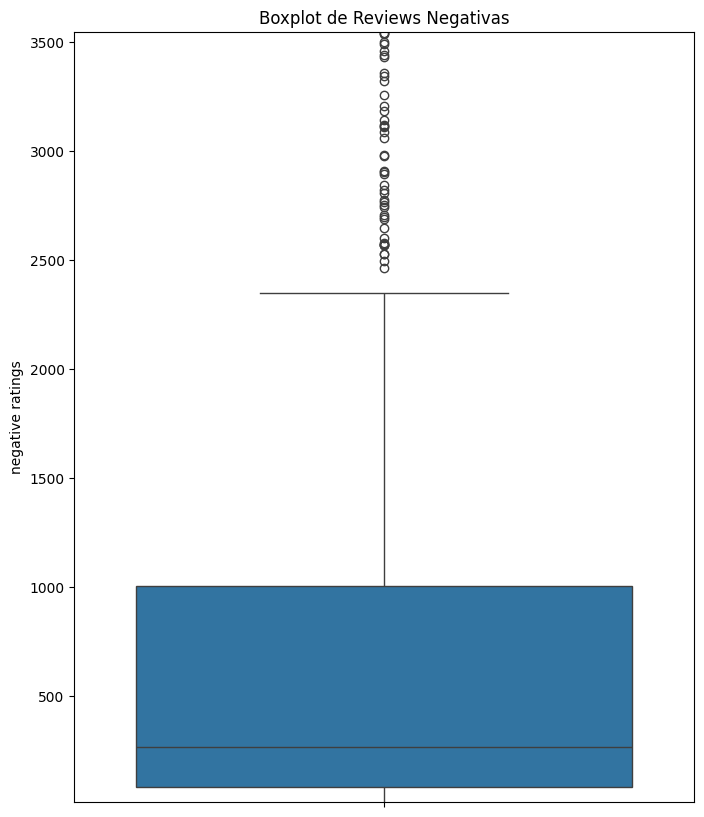

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

avaliado = 'negative ratings'
df = pd.read_csv('games_data.csv')
Q1 = df[avaliado].quantile(0.25)  # Primeiro quartil (25%)
Q2 = df[avaliado].quantile(0.50)  # Mediana (50%)
Q3 = df[avaliado].quantile(0.75)  # Terceiro quartil (75%)

IQR = Q3 - Q1

print(f"Q1 (1¬∫ Quartil, 25%): {Q1}")
print(f"Q2 (Mediana, 50%): {Q2}")
print(f"Q3 (3¬∫ Quartil, 75%): {Q3}")
print(f"IQR (Intervalo Interquartil): {IQR}")


boxplot_reviews = df[avaliado]



plt.figure(figsize=(8, 10))
sns.boxplot(data=boxplot_reviews)

plt.title('Boxplot de Reviews Negativas')

plt.ylim(boxplot_reviews.quantile(0.05), boxplot_reviews.quantile(0.90))

plt.show()

* **Primeiro Quartil (Q1)** = 25% dos jogos analizados tem 82.75 ou menos reviews negativas.
* **Segundo Quartil (Q2)** = Mediana. 50% dos jogos apresenta 268 ou menos reviews negativas.
* **Terceiro Quartil (Q3)** = 75% dos jogos tem aprox. 1004.75 ou menos reviews negativas.
* **Intervalo Interquartil (IQR)** = Nos informa a variabillidade dos dados. Um IQR de 922 sugere uma dispers√£o consider√°vel nos reviews negativos entre os jogos. Enquanto alguns jogos podem ser bem recebidos (menos de 82.75) outros podem ter muito feedback negativo.
* **Outliers** = H√° a presen√ßa de muitos outliers o que pode distorcer a an√°lise

#### Boxplot das reviews positivas (2.1.2)


Q1 (1¬∫ Quartil, 25%): 3177.0
Q2 (Mediana, 50%): 7687.0
Q3 (3¬∫ Quartil, 75%): 23914.25
IQR (Intervalo Interquartil): 20737.25


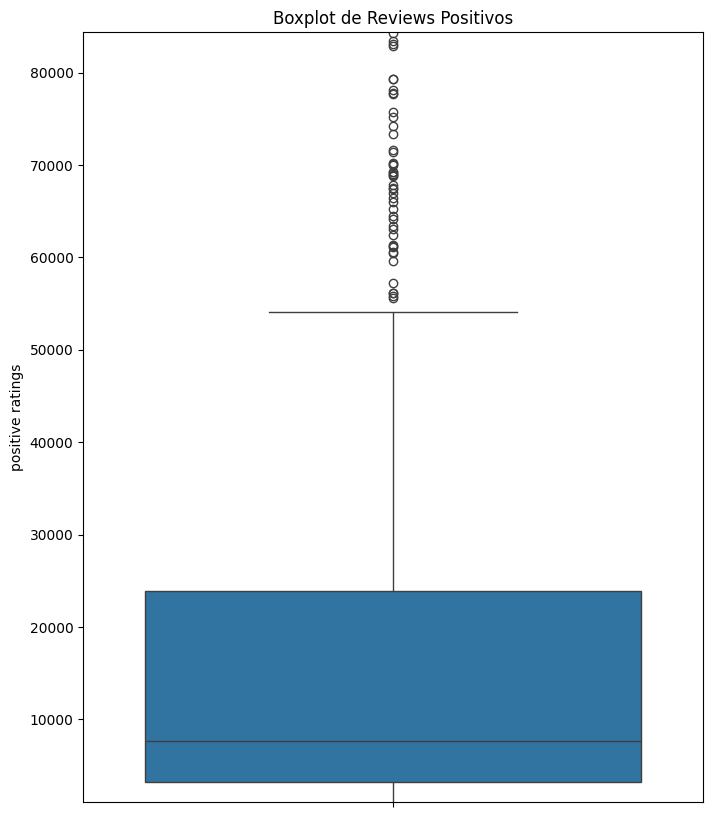

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

avaliado = 'positive ratings'
df = pd.read_csv('games_data.csv')
Q1 = df[avaliado].quantile(0.25)  # Primeiro quartil (25%)
Q2 = df[avaliado].quantile(0.50)  # Mediana (50%)
Q3 = df[avaliado].quantile(0.75)  # Terceiro quartil (75%)

IQR = Q3 - Q1

print(f"Q1 (1¬∫ Quartil, 25%): {Q1}")
print(f"Q2 (Mediana, 50%): {Q2}")
print(f"Q3 (3¬∫ Quartil, 75%): {Q3}")
print(f"IQR (Intervalo Interquartil): {IQR}")


boxplot_reviews = df[avaliado]



plt.figure(figsize=(8, 10))
sns.boxplot(data=boxplot_reviews)

plt.title('Boxplot de Reviews Positivos')

plt.ylim(boxplot_reviews.quantile(0.05), boxplot_reviews.quantile(0.90))

plt.show()

- **Q1 (1¬∫ Quartil, 25%)**: 25% dos jogos analisados t√™m 3177.0 ou menos reviews positivos.
- **Q2 (Mediana, 50%)**: 50% dos jogos apresentam 7687.0 ou menos reviews positivos.
- **Q3 (3¬∫ Quartil, 75%)**: 75% dos jogos t√™m aproximadamente 23914.25 ou menos reviews positivos.
- **IQR (Intervalo Interquartil)**: O IQR √© de 20737.25, indicando uma ampla variabilidade nos reviews positivos entre os jogos.


### Desvio Padr√£o (2.2)
#### Desvio Padr√£o da Quantidade de Reviews (Positivas/Negativas) (2.2.1)

* An√°lise para observar a dispers√£o das avalia√ß√µes


In [92]:
import pandas as pd
df = pd.read_csv('games_data.csv')

# Calculando primeiro a media para comparar no final
mean_positive = df['positive ratings'].mean()
mena_negative = df['negative ratings'].mean()

# Calcualndo o desvio padr√£o
std_positive = df['positive ratings'].std()
std_negative = df['negative ratings'].std()

print(f"A media das avalia√ß√µes positivas √© {mean_positive:.2f} e o desvio padrao √© {std_positive:.2f}")
print(f"A media das avalia√ß√µes negativas √© {mena_negative:.2f} e o desvio padrao √© {std_negative:.2f}")


A media das avalia√ß√µes positivas √© 38218.62 e o desvio padrao √© 105223.15
A media das avalia√ß√µes negativas √© 1540.84 e o desvio padrao √© 4399.95


A m√©dia das avalia√ß√µes positivas √© cerca de 38 mil enquanto o desvio padr√£o √© de cerca de 105 mil que √© um desvio padr√£o muito grande comparado a m√©dia. O que tamb√©m acontece com as avalia√ß√µes negativas em que sua m√©dia reside em aprox. 1500 e o desvio padr√£o √© aproximado em 4400. Em ambos os casos indica que os jogos apresentam uma grande varia√ß√£o nas avalia√ß√µes alguns tem muito mais avalia√ß√µes positivas ou negativas que a m√©dia e outros tem bem menos.

##### Sobre as avalia√ß√µes positivas: (2.2.1.a)
M√©dia alta e desvio padr√£o muito elevado, sugererindo assim que h√° muita varia√ß√£o nas avalia√ß√µes positivas.
##### Sobre as avalia√ß√µes negativas: (2.2.1.b)
M√©dia baixa e desvio padr√£o mais pr√≥ximo da m√©dia, sugerindo assim que h√° varia√ß√£o, mas pouca se comparada com a positva, implicando assim com que as avalia√ß√µes negativas estejam sempre pr√≥ximas da m√©dia

#### Desvio padr√£o do total de reviews üìè (2.2.2)

In [93]:
import pandas as pd
df = pd.read_csv('games_data.csv')


total_reviews = df['total reviews']
media_total_reviews = total_reviews.mean()
stdtotalreviews = total_reviews.std()

print(f"A media do total dos reviews √© {media_total_reviews}")
print(f"O desvio padr√£o do total dos reviews √©: {stdtotalreviews}")

A media do total dos reviews √© 39759.454
O desvio padr√£o do total dos reviews √©: 109225.57031854443


* O desvio padr√£o 109225 √© bem maior que a m√©dia aprox. 40 mil. Isso indica que h√° uma grande varia√ß√£o no n√∫mero total de reviews entre os jogos.
* Em termos pr√°ticos, isso sugere que muitos jogos t√™m um n√∫mero de reviews muito superior √† m√©dia, enquanto outros t√™m um n√∫mero muito inferior.

##### Encontrando outliers atrav√©s do desvio padr√£o (2.2.2.a)
Se considerarmos um dado outlier se dois z-score de dist√¢ncia ent√£o teremos os seguintes jogos como outliers

In [94]:
import pandas as pd
df = pd.read_csv('games_data.csv')


total_reviews = df['total reviews']
media_total_reviews = total_reviews.mean()
stdtotalreviews = total_reviews.std()

print(f"A media do total dos reviews √© {media_total_reviews}")
print(f"O desvio padr√£o do total dos reviews √©: {stdtotalreviews}")

# Nova adi√ßao: encontrar outliers
outlier_threshold_high = media_total_reviews + 2 * stdtotalreviews
outlier_threshold_low = media_total_reviews - 2 * stdtotalreviews

outliers = df[(total_reviews > outlier_threshold_high) | (total_reviews < outlier_threshold_low)]
# ordenar em ordem decrescente
outliers_sorted = outliers.sort_values(by='total reviews', ascending=False)

print("\nJogos com total de reviews considerados outliers:")
print(outliers_sorted[['name', 'total reviews']])

A media do total dos reviews √© 39759.454
O desvio padr√£o do total dos reviews √©: 109225.57031854443

Jogos com total de reviews considerados outliers:
                              name  total reviews
7                         Terraria        1336055
44                     Garry's Mod        1102154
815                     ELDEN RING         968014
85              Black Myth: Wukong         923036
10                   Left 4 Dead 2         889846
15          Euro Truck Simulator 2         803058
99        The Witcher 3: Wild Hunt         798779
1                   Stardew Valley         760658
128                   Phasmophobia         711145
48                 Baldur's Gate 3         661526
190                     The Forest         558516
175          Don't Starve Together         468413
420                        Valheim         467405
25                  Lethal Company         435879
256                    Dying Light         430446
0                         Portal 2         406

Essa lista de jogos representa jogos que fogem da distribui√ß√£o apontada pelo z-score do desvio padr√£o do total de reviews

---

## Parte 3: Gr√°ficos
- 3.1 Plataformas
   - 3.1.1 As dez plataformas que mais lan√ßaram jogos entre 1992 e 2004. (Gr√°fico de Barras Vertical)
   - 3.1.2 As dez plataformas que mais lan√ßaram jogos por ano (Grafico de Linhas) 
- 3.2 Correla√ß√£o Avaliativa
   - 3.2.1 Uma boa avalia√ß√£o do jogo na Steam se relaciona com o total de reviews?
   - 3.2.2 Representa√ß√£o grafica da correla√ß√£o entre raz√£o positiva de reviews e o total (Matriz de Correla√ß√£o)
     - 3.2.2.a Adere√ßando dados outliers para melhorar visualiza√ß√£o do gr√°fico 
- 3.3 G√™neros
   - 3.3.1 G√™neros de jogos com maior sucesso entre o p√∫blico (Gr√°fico de Barras Horizontal)
   - 3.3.2 G√™nero de Jogos com Maior Sucesso entre a Cr√≠tica 
   - 3.3.3 G√™neros de Jogos: Cr√≠tica vs. P√∫blico (Tabela Comparativa)
     - 3.3.3.a Tabela da varia√ß√£o de posi√ß√µes dos g√™neros de jogos entre p√∫blico e cr√≠tica 
- 3.4 Score

## Plataformas (3.1)

### As dez plataformas que mais lan√ßaram jogos entre 1992 e 2004 (3.1.1)

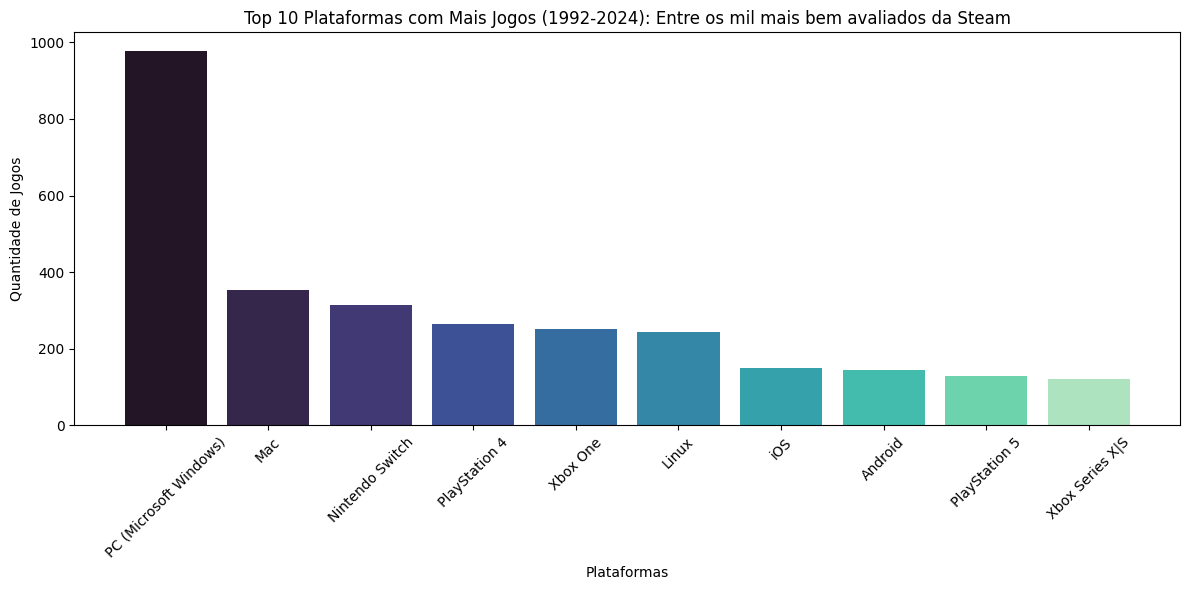

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados do CSV
df = pd.read_csv('games_data.csv')

# Converter o timestamp Unix para datetime e extrair o ano
df['release_year'] = pd.to_datetime(df['first_release_date'], unit='s').dt.year

# Lidar com as listas para transforma-las em string
df['platforms'] = df['platforms'].apply(lambda x: eval(x) if isinstance(x, str) else x)
df_exploded = df.explode('platforms')
df_exploded['platforms'] = df_exploded['platforms'].astype(str)

# Contar jogos por plataforma
frequencia = df_exploded.groupby('platforms').size().reset_index(name='count')

# 10 plataformas mais frequentes
top_platforms = frequencia.nlargest(10, 'count')

# plotando o grafico
plt.figure(figsize=(12, 6)) # deixar menos quadrado
colors = sns.color_palette("mako", len(top_platforms))  # paleta de cores mako 
plt.bar(top_platforms['platforms'], top_platforms['count'], color=colors)
plt.title('Top 10 Plataformas com Mais Jogos (1992-2024): Entre os mil mais bem avaliados da Steam')
plt.xlabel('Plataformas')
plt.ylabel('Quantidade de Jogos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


* O limite de dez plataformas que tiverem o indice de presen√ßa mais alto se deve a uma visualiza√ß√£o melhor. 
* O gr√°fico indica que os jogos de PC foram dominantes durante todo o per√≠odo, o que faz sentido, haja vista que os jogos do dataset recolhido s√£o jogos para Steam que √© uma distribuidora de jogos para computador. Portanto, em geral, os jogos ser√£o dispon√≠veis para computador, o que enviesa o gr√°fico. 
* √â importante lembrar que os jogos mobile s√£o apenas jogos que s√£o lan√ßados para mobile e tamb√©m PC, em dados brutos a produ√ß√£o de jogos mobile √© exponencialmente maior que a produ√ß√£o de jogos lan√ßados para computador. 
* Al√©m disso todos os gr√°ficos cortam o vi√©s de serem o top 1000 jogos mais bem avaliados da Steam.

### As dez plataformas que mais lan√ßaram jogos por ano (3.1.2)

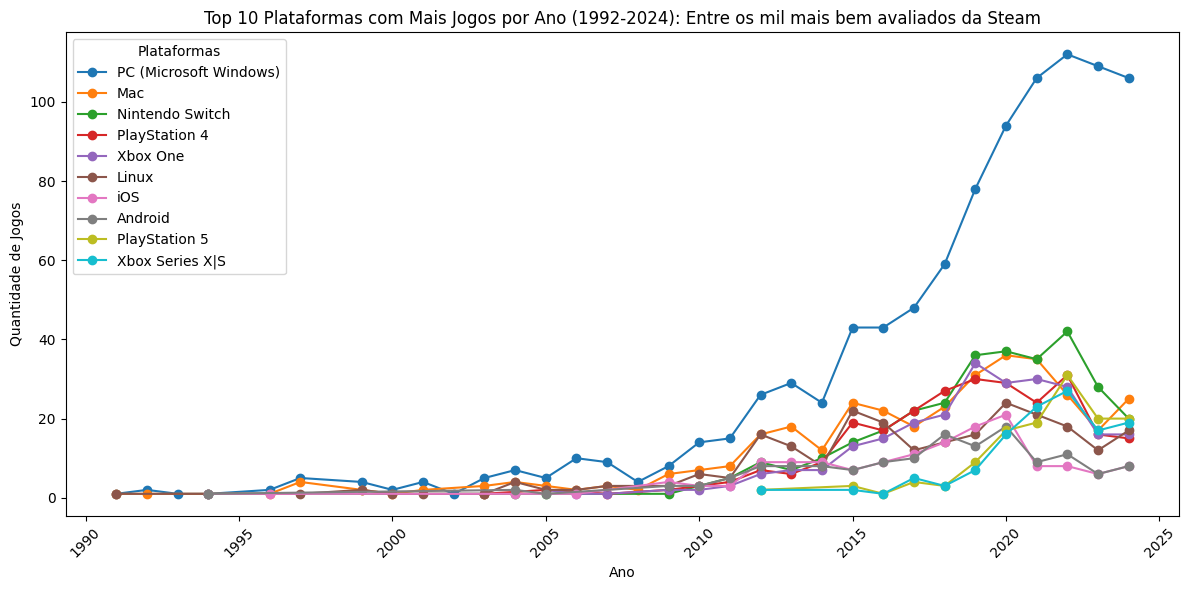

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('games_data.csv')

# Ano
df['release_year'] = pd.to_datetime(df['first_release_date'], unit='s').dt.year

# trabalhar com listas de plataforma
df['platforms'] = df['platforms'].apply(lambda x: eval(x) if isinstance(x, str) else x)
df_exploded = df.explode('platforms')
df_exploded['platforms'] = df_exploded['platforms'].astype(str)

# Contar a quantidade de jogos por ano e plataforma
frequencia = df_exploded.groupby(['release_year', 'platforms']).size().reset_index(name='count')

# Filtrar as 10 plataformas mais frequentes em todos os anos (deixar visivelmente melhor)
top_platforms = frequencia.groupby('platforms')['count'].sum().nlargest(10).index
frequencia_top = frequencia[frequencia['platforms'].isin(top_platforms)]

# plotar grafico
plt.figure(figsize=(12, 6))
for platform in top_platforms:
    plt_data = frequencia_top[frequencia_top['platforms'] == platform]
    plt.plot(plt_data['release_year'], plt_data['count'], marker='o', label=platform)

plt.title('Top 10 Plataformas com Mais Jogos por Ano (1992-2024): Entre os mil mais bem avaliados da Steam')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Jogos')
plt.xticks(rotation=45)
plt.legend(title='Plataformas')
plt.tight_layout()
plt.show()


* O limite de dez plataformas que tiverem o indice de presen√ßa mais alto se deve a uma visualiza√ß√£o melhor. 
* Entre as outras plataformas fora PC, Mac desponta em segundo lugar nos anos ao longo dos anos, mas sendo superado pelo Nintendo Switch nos anos recentes. 
* J√° Playstation e Xbox compatilham lugares pr√≥ximos, sendo os da nova gera√ß√£o menos presentes. O que faz sentido em vista a recep√ß√£o dos consoles da nona gera√ß√£o (PS5, Xbox Series S|X) em frente os da oitava gera√ß√£o; os jogos se tornam cada vez mais caros no desenvolvimento.
* Lembrando que o gr√°fico avalia a quantidade de jogos lan√ßados e n√£o vendas, portanto faz sentido pois √© relativamente mais simples lan√ßar um jogo para computador do que para console. E jogos do Nintendo Switch, pode-se argumentar que s√£o menos trabalhosos at√© pela capacidade t√©cnica do console. 
* Outro ponto interessante √© a presen√ßa de iOS e Android entre os jogos que s√£o lan√ßados para o computador, os quais apresentavam um crescimento constante de 2010 at√© 2020 - lembrando que antes de 2010 n√£o era t√£o comum esses jogos serem lan√ßados para PC e mobile (iOS lan√ßou em 2006 e Android em 2008) - estas n√£o representam um crescimento constante ap√≥s 2020. Enquanto outras plataformas despontaram em 2020, por conta da pandemia do Covid-19, mas apresentando queda logo ap√≥s o per√≠odo quando a legisla√ß√£o come√ßou a relaxar e as pessoas voltaram a sair de casa.
* O Nintendo Switch est√° em fim de ciclo (lan√ßado em 2017) j√° com 7 anos, e o novo console da nintendo foi anunciado (Nintendo Switch 2) em que deve fazer sua estreia em 2025, portanto concentrando o desenvolvimento de novos jogos para o novo dispositivo. O que justifica a queda na produ√ß√£o ap√≥s o ano de 2022. Em 2022 o console j√° tinha 5 anos de exist√™ncia em um mercado que o tempo m√©dio da gera√ß√£o era de 6 anos - O Switch superou essa marca resistindo sete anos (2024) e s√≥ ser√° lan√ßado no oitavo ano de exist√™ncia do antigo console.

## Correla√ß√£o Avaliativa (3.2)
### Uma boa avalia√ß√£o se relaciona com o total de reviews? (3.2.1)


In [97]:
import seaborn as sns
import pandas as pd


# Leitura do CSV
df = pd.read_csv('games_data.csv')

# Remover v√≠rgulas dos n√∫meros e o s√≠mbolo de porcentagem, convertendo para float
df['rating percentage'] = df['rating percentage'].str.replace('%', '').str.replace(',', '').astype(float)

# Converter 'total reviews' para string, remover v√≠rgulas, e converter para float
df['total reviews'] = df['total reviews'].astype(str).str.replace(',', '').astype(float)

# Calcular a correla√ß√£o entre 'total reviews' e 'rating percentage'
correlacao = df['total reviews'].corr(df['rating percentage'])

print(correlacao)




0.007220126054406023


O valor da correla√ß√£o 0.00720.0072 indica uma correla√ß√£o muito fraca, quase inexistente, entre as colunas 'total reviews' e 'rating percentage'. Isso significa que, com base nos dados, n√£o h√° uma rela√ß√£o linear significativa entre o n√∫mero total de reviews e a porcentagem de avalia√ß√£o.

### Matriz de Correla√ß√£o (3.2.2)

Correla√ß√£o: 0.007220126054406023


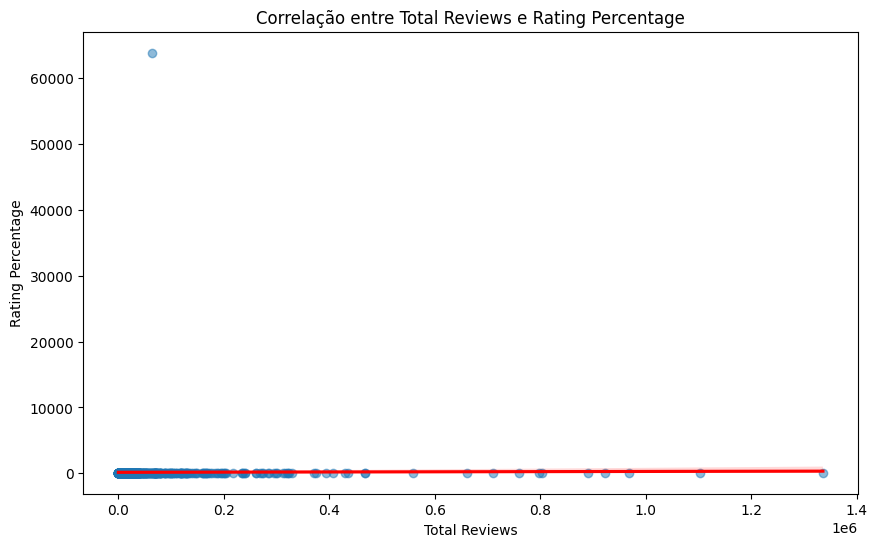

In [98]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Leitura do CSV
df = pd.read_csv('games_data.csv')

# Remover v√≠rgulas dos n√∫meros e o s√≠mbolo de porcentagem, convertendo para float
df['rating percentage'] = df['rating percentage'].str.replace('%', '').str.replace(',', '').astype(float)

# Converter 'total reviews' para string, remover v√≠rgulas, e converter para float
df['total reviews'] = df['total reviews'].astype(str).str.replace(',', '').astype(float)

# Calcular a correla√ß√£o entre 'total reviews' e 'rating percentage'
correlacao = df['total reviews'].corr(df['rating percentage'])
print(f'Correla√ß√£o: {correlacao}')

# Criar gr√°fico de dispers√£o com linha de regress√£o
plt.figure(figsize=(10, 6))
sns.regplot(x='total reviews', y='rating percentage', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Correla√ß√£o entre Total Reviews e Rating Percentage')
plt.xlabel('Total Reviews')
plt.ylabel('Rating Percentage')
plt.show()


Gr√°fico que demonstra a inexist√™ncia da correla√ß√£o entre o n√∫mero total de reviews e a porcentagem do quociente entre reviews positivas e negativas. Nesse sentido, √© poss√≠vel refletir que um jogo mais popular - com um n√∫mero maior de avalia√ß√µes - n√£o presume uma avalia√ß√£o melhor esses itens n√£o est√£o correlacionados. Com a presen√ßa de um outlier que distorce o gr√°fico

#### Adere√ßando o outlier para melhorar o gr√°fico (3.2.2.a)

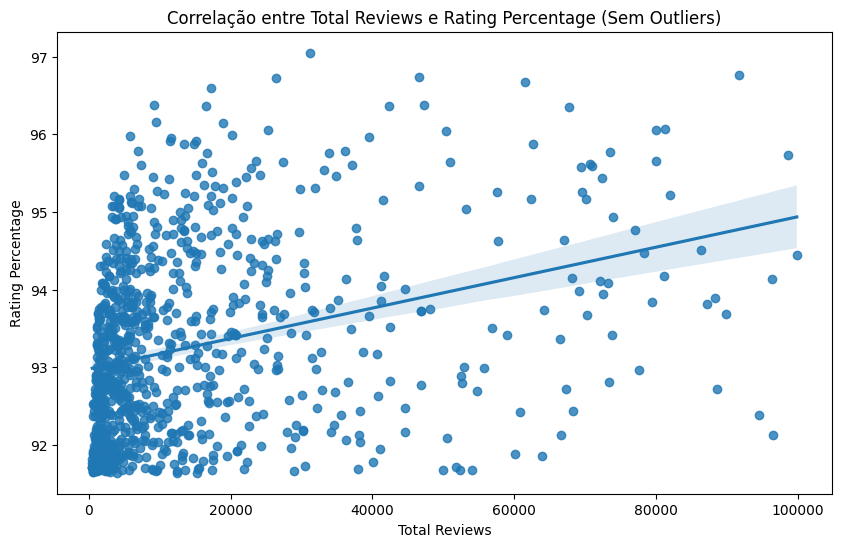

In [99]:
# Remover outliers com base em limites para 'total reviews' ou 'rating percentage'
df_filtered = df[(df['total reviews'] < 100000) & (df['rating percentage'] < 100)]

plt.figure(figsize=(10, 6))
sns.regplot(x='total reviews', y='rating percentage', data=df_filtered)
plt.title('Correla√ß√£o entre Total Reviews e Rating Percentage (Sem Outliers)')
plt.xlabel('Total Reviews')
plt.ylabel('Rating Percentage')
plt.show()


O gr√°fico apresenta pontos quase que aleat√≥rios e uma grande concentra√ß√£o em jogos com pequeno n√∫mero de avalia√ß√µes.

## G√™neros de Jogos (3.3)

### G√™neros de Jogos com Maior Sucesso entre o P√∫blico (3.3.1)

                          genres  public_rating_igdb
15                     Roguelike            8.700000
25                  Visual Nove;            8.500000
24     Turn-based strategy (TBS)            8.403448
8                        Pinball            8.400000
27  hack and slash or beat em up            8.017241
16            Role-playing (RPG)            8.005422
12                    QuizTrivia            7.980000
14      Real Time Strategy (RTS)            7.976923
9                       Platform            7.923596
17                       Shooter            7.907080
21                      Strategy            7.893798
22                      Tactical            7.878947
1                      Adventure            7.865835
3              Card & Board Game            7.830000
11                        Puzzle            7.766486
7                          Music            7.723810
0                         Action            7.710000
19                     Simulator            7.

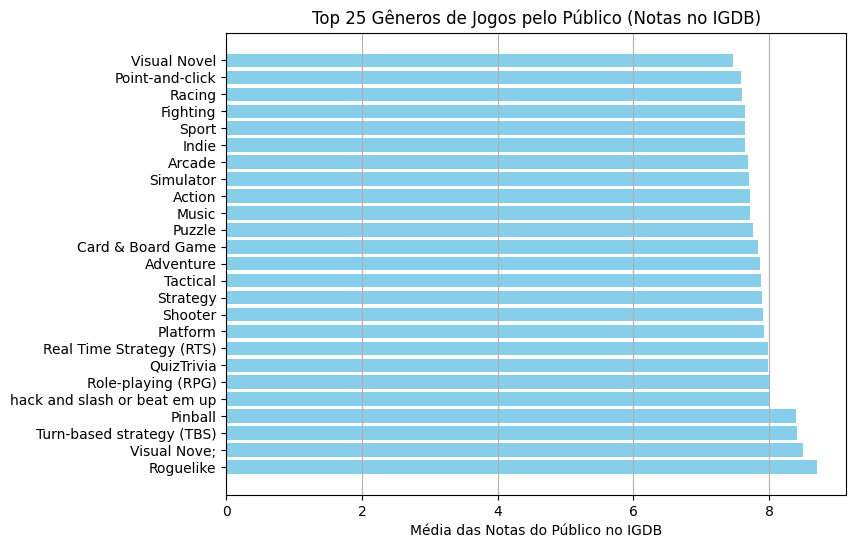

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('games_data.csv')

df['rating percentage'] = df['rating percentage'].str.replace('%', '').str.replace(',', '').astype(float) / 100

df['public_rating_igdb'] = pd.to_numeric(df['public_rating_igdb'].str.replace(',', ''), errors='coerce')

df_exploded = df.explode('genres')

df_exploded['genres'] = df_exploded['genres'].str.strip('[]').str.replace("'", "").str.split(", ")

df_exploded = df_exploded.explode('genres')

average_ratings = df_exploded.groupby('genres')['public_rating_igdb'].mean().reset_index()

average_ratings = average_ratings.sort_values(by='public_rating_igdb', ascending=False)

top_10_genres = average_ratings.head(25)

print(top_10_genres)

plt.figure(figsize=(8, 6))
plt.barh(top_10_genres['genres'], top_10_genres['public_rating_igdb'], color='skyblue')
plt.xlabel('M√©dia das Notas do P√∫blico no IGDB')
plt.title('Top 25 G√™neros de Jogos pelo P√∫blico (Notas no IGDB)')
plt.grid(axis='x')
plt.show()


O g√™nero de maior sucesso entre o p√∫blico foi Roguelike e o de menor sucesso foi Visual Novel.

### G√™nero de Jogos com Maior Sucesso entre a Cr√≠tica (3.3.2)

                          genres  aggregated_rating
15                     Roguelike           9.500000
22     Turn-based strategy (TBS)           8.782609
23                  Visual Nove;           8.700000
3              Card & Board Game           8.650000
21                      Tactical           8.600000
25  hack and slash or beat em up           8.528000
8                        Pinball           8.500000
7                          Music           8.469231
19                         Sport           8.466667
16            Role-playing (RPG)           8.370940
20                      Strategy           8.313580
1                      Adventure           8.266284
11                        Puzzle           8.225455
24                  Visual Novel           8.217391
6                          Indie           8.191139
13                        Racing           8.166667
9                       Platform           8.144286
17                       Shooter           8.142169
18          

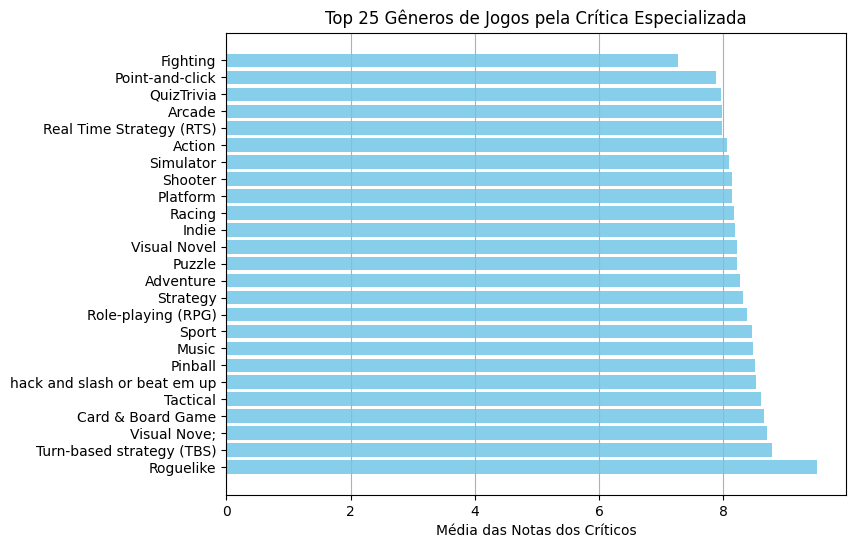

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('games_data.csv')

df['rating percentage'] = df['rating percentage'].str.replace('%', '').str.replace(',', '').astype(float) / 100


df_exploded = df.explode('genres')

df_exploded['genres'] = df_exploded['genres'].str.strip('[]').str.replace("'", "").str.split(", ")

df_exploded = df_exploded.explode('genres')

df_exploded = df_exploded[(df_exploded['aggregated_rating'] >= 0) & (df_exploded['aggregated_rating'] <= 10)]

average_ratings = df_exploded.groupby('genres')['aggregated_rating'].mean().reset_index()

average_ratings = average_ratings.sort_values(by='aggregated_rating', ascending=False)

top_10_genres = average_ratings.head(25)

print(top_10_genres)

plt.figure(figsize=(8, 6))
plt.barh(top_10_genres['genres'], top_10_genres['aggregated_rating'], color='skyblue')
plt.xlabel('M√©dia das Notas dos Cr√≠ticos')
plt.title('Top 25 G√™neros de Jogos pela Cr√≠tica Especializada')
plt.grid(axis='x')
plt.show()


O g√™nero com maior sucesso entre a cr√≠tica foi Roguelike e o de menor sucesso foi o g√™nero de luta.

### G√™neros de Jogos: Cr√≠tica vs. P√∫blico (3.3.3)
---------------------------- Cr√≠tica ------------------------------------------------------ P√∫blico -------------------------------
| Rank |        genres                         | public_rating_igdb |        genres                         | aggregated_rating |
|------|---------------------------------------|---------------------|---------------------------------------|-------------------|
|  1   | Roguelike                             | 8.700000            | Roguelike                             | 9.500000          |
|  2   | Visual Nove;                          | 8.500000            | Turn-based strategy (TBS)            | 8.782609          |
|  3   | Turn-based strategy (TBS)            | 8.403448            | Visual Nove;                          | 8.700000          |
|  4   | Pinball                               | 8.400000            | Card & Board Game                     | 8.650000          |
|  5   | hack and slash or beat em up         | 8.017241            | Tactical                              | 8.600000          |
|  6   | Role-playing (RPG)                   | 8.005422            | hack and slash or beat em up         | 8.528000          |
|  7   | QuizTrivia                            | 7.980000            | Pinball                               | 8.500000          |
|  8   | Real Time Strategy (RTS)             | 7.976923            | Music                                 | 8.469231          |
|  9   | Platform                              | 7.923596            | Sport                                 | 8.466667          |
| 10   | Shooter                               | 7.907080            | Role-playing (RPG)                   | 8.370940          |
| 11   | Strategy                              | 7.893798            | Strategy                              | 8.313580          |
| 12   | Tactical                              | 7.878947            | Adventure                             | 8.266284          |
| 13   | Adventure                             | 7.865835            | Puzzle                                | 8.225455          |
| 14   | Card & Board Game                     | 7.830000            | Visual Novel                          | 8.217391          |
| 15   | Puzzle                                | 7.766486            | Indie                                 | 8.191139          |
| 16   | Music                                 | 7.723810            | Racing                                | 8.166667          |
| 17   | Action                                | 7.710000            | Platform                              | 8.144286          |
| 18   | Simulator                             | 7.709884            | Shooter                               | 8.142169          |
| 19   | Arcade                                | 7.693333            | Simulator                             | 8.088889          |
| 20   | Indie                                 | 7.648807            | Action                                | 8.050000          |
| 21   | Sport                                 | 7.646154            | Real Time Strategy (RTS)             | 7.980000          |
| 22   | Fighting                              | 7.637500            | Arcade                                | 7.970732          |
| 23   | Racing                                | 7.605556            | QuizTrivia                            | 7.966667          |
| 24   | Point-and-click                       | 7.584507            | Point-and-click                       | 7.874286          |
| 25   | Visual Novel                          | 7.465278            | Fighting                              | 7.266667          |


* Como podemos ver h√° algumas interse√ß√µes entre os g√™neros como o Roguelike que est√° em primeiro lugar em g√™nero nos dois p√∫blicos j√° outros como Visual Novel √© um g√™nero mais apreciado pela cr√≠tica do que pelo p√∫blico.
* J√° os jogos de luta aparecem em coloca√ß√µes mais baixas nos dois rankings
* QuizTrivia √© o g√™nero que mais varia coloca√ß√µes, ocupando a 23 na avalia√ß√£o do p√∫blico e uma 7a posi√ß√£o mais positiva pela cr√≠tica. Em segundo lugar vem Real Time Strategy, ocupando a 21a posi√ß√£o do p√∫blica e 8a posi√ß√£o pela cr√≠tica.

#### Tabela da varia√ß√£o de posi√ß√µes dos g√™neros de jogos entre p√∫blico e cr√≠tica (3.3.3.a)

| G√™nero                         | Posi√ß√£o Cr√≠tica | Posi√ß√£o P√∫blico | Diferen√ßa de Posi√ß√£o |
|--------------------------------|----------------|------------------|----------------------|
| QuizTrivia                     | 7              | 23               | 16                   |
| Real Time Strategy (RTS)      | 8              | 21               | 13                   |
| Visual Novel                   | 3              | 14               | 11                   |
| Shooter                        | 10             | 18               | 8                    |
| Tactical                       | 5              | 12               | 7                    |
| Indie                          | 20             | 15               | 5                    |
| Role-playing (RPG)            | 6              | 10               | 4                    |
| Fighting                       | 22             | 25               | 3                    |
| Pinball                        | 4              | 7                | 3                    |
| Turn-based strategy (TBS)      | 2              | 3                | 1                    |


---

### Sistema de Score entre os jogos e suas avalia√ß√µes (3.4)

Melhores Jogos e suas Pontua√ß√µes Normalizadas:
AVICII Invector: 100.00
Trine: 73.94
ELDEN RING: 71.33
Baldur's Gate 3: 70.81
The Witcher 3: Wild Hunt: 70.27
Disco Elysium: 70.19
Persona 5 Royal: 69.81
Broforce: 69.61
Persona 4 Golden: 69.53
God of War: 69.34


C:\Users\Rod\AppData\Local\Temp\ipykernel_11024\2784227206.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='normalized_score', y='name', data=top_games, palette='Blues_r')


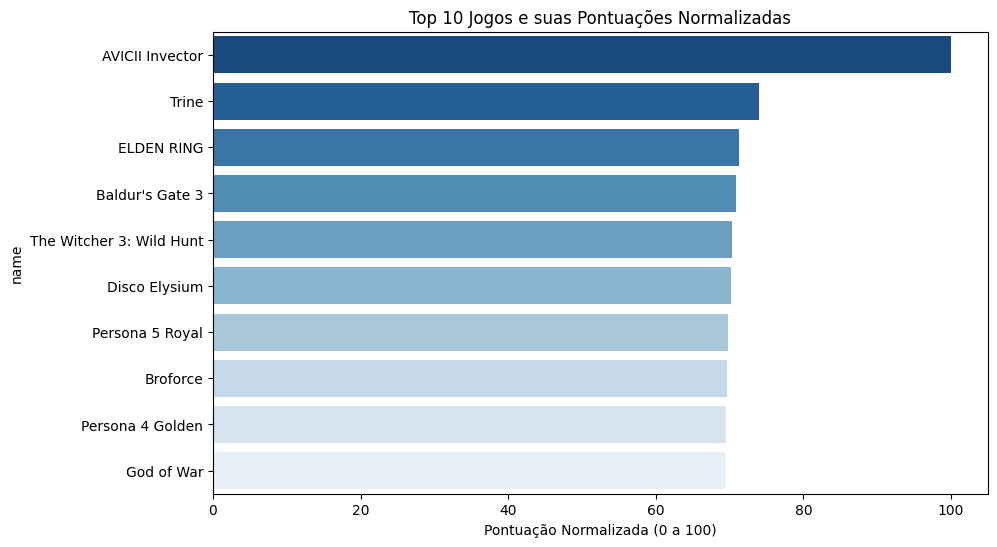

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ler o arquivo CSV
df = pd.read_csv('games_data.csv')

# Fun√ß√£o para limpar e converter s√©ries
def clean_and_convert(series):
    series = series.astype(str).replace('nan', '')
    series.replace('', np.nan, inplace=True)
    cleaned_series = series.str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
    return cleaned_series.astype(float)

# Limpar os dados
df['positive ratings'] = clean_and_convert(df['positive ratings'])
df['negative ratings'] = clean_and_convert(df['negative ratings'])
df['total reviews'] = clean_and_convert(df['total reviews'])
df['aggregated_rating'] = clean_and_convert(df['aggregated_rating'])
df['aggregated_rating_count'] = clean_and_convert(df['aggregated_rating_count'])
df['public_rating_igdb'] = clean_and_convert(df['public_rating_igdb'])
df['public_rating_count'] = clean_and_convert(df['public_rating_count'])

# Calcular o quociente de avalia√ß√µes positivas
df['positive_review_ratio'] = df['positive ratings'] / df['total reviews']

# Defini√ß√£o da f√≥rmula do score
df['score'] = (
    (df['aggregated_rating'] * df['aggregated_rating_count']) +
    (df['public_rating_igdb'] * df['public_rating_count']) +
    (df['positive_review_ratio'] * 100)
) / (
    df['aggregated_rating_count'] + 
    df['public_rating_count'] + 
    100
)

# Normalizar a pontua√ß√£o para ficar entre 0 e 100
min_score = df['score'].min()
max_score = df['score'].max()
df['normalized_score'] = ((df['score'] - min_score) / (max_score - min_score)) * 100

# Remover jogos com pontua√ß√£o NaN
valid_scores = df[['name', 'normalized_score']].dropna()

# Classifica√ß√£o
top_games = valid_scores.sort_values(by='normalized_score', ascending=False).head(10)

print("Melhores Jogos e suas Pontua√ß√µes Normalizadas:")
for index, row in top_games.iterrows():
    print(f"{row['name']}: {row['normalized_score']:.2f}")

# Plotar os melhores jogos usando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='normalized_score', y='name', data=top_games, palette='Blues_r')
plt.xlabel('Pontua√ß√£o Normalizada (0 a 100)')
plt.title('Top 10 Jogos e suas Pontua√ß√µes Normalizadas')
plt.show()


O resultado √© interessante porque o primeiro colocado √© um jogo de ritmo de um artista da m√∫sica, j√° em segundo √© um jogo de plataforma j√° um pouco mais antigo (2009). Seguido de t√≠tulos mais modernos como Elden Ring, Baldur's Gate 3 e The Witcher. Observando esses t√≠tulos √© poss√≠vel observar realmente uma aprecia√ß√£o cr√≠tica e do p√∫blico nesses t√≠tulos.

---